<a href="https://colab.research.google.com/github/LibBonda/17-PySta/blob/main/LIB_Exercises_on_Supervised_Machine_Learning_Classification_%26_Use_Cases_(Part_2)a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 01**

# **Exercise 01: Customer Churn Prediction (Role: Customer Analytics Specialist)**

**Scenario:**

You’re now a data scientist focusing on customer retention. The goal is to predict which customers are likely to cancel (churn) their service subscription, so the company can proactively engage them with retention strategies. You aim to build a model to predict churn and showcase this as a project where you saved a company millions by reducing churn.

**Dataset:**

*A telecom customer churn dataset (common in open data repositories). Typically,
each record represents a customer’s details at a point in time, including whether they left
the company. Features might include:*
- *Customer demographics (gender, age, senior citizen status).*
- *Service details (contract type, monthly charges, tenure with the company, etc.).*
- *Usage patterns or support calls (if available).*
- *A binary churn label indicating if the customer has churned (Yes/No or 1/0).*

### **Goal:**
- Build a classification model (churn vs. not churn).
- Emphasize an end-to-end pipeline: data cleaning, exploratory data analysis (EDA), feature engineering, model training, and evaluation.
- Finally, outline how to turn this into a portfolio piece branding yourself as a **Customer Analytics Specialist**.

## **01. Load Libraries, Data and Review the Data**

In [ ]:
import pandas as pd # Import the pandas library for data manipulation
import numpy as np # Import the numpy library for numerical operations
import matplotlib.pyplot as plt # Import matplotlib for plotting and visualizations
import seaborn as sns # Import seaborn for enhanced data visualizations

# Optional: Set display options for better viewing of dataframes
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("Libraries loaded successfully!")

Libraries loaded successfully!


### **01a. Load the dataset and create a Data frame**

In [ ]:
# Load the Telecom customer churn dataset into a pandas DataFrame
df = pd.read_csv('/content/Telcomz_Customer_Churn.csv')

# Display the first 5 rows of the DataFrame to inspect the data
display(df.head())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### **01b. Understand Features**

In [ ]:
# Display the first few rows of the DataFrame to understand its structure and content
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Generate descriptive statistics of the numerical columns in the DataFrame
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### **Dimensions:**
- Use DataFrame.shape to note how many rows (customers) and
columns (features) are present.
- Check if there are enough samples to train a model reliably?

In [ ]:
# Display the number of rows and columns in the DataFrame
df.shape

(7043, 21)

## **02. Data Cleaning**

### **02a. Check Missing Values**
- Check for missing or blank values using

In [ ]:
# Check for missing values in each column
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


#### **Missing values and null values:**
- It is noted that there are missing values in the TotalCharges column in the dataset

#### impute the missing values with the median value if any values are missing.

In [ ]:
# impute the missing TotalCharges values with the median value
#df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())
#df.isnull().sum()

### **02b. Data Types:**
- Ensure numeric columns are indeed numeric.

In [ ]:
# Display data types and non-null values for each column to identify potential issues
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [ ]:
# Convert 'TotalCharges' to numeric, coerce errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
#Verify the conversion by checking data types again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [ ]:
# impute the NaN TotalCharges values with the median value
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


### **02c. Drop Unnecessary Columns:**
- Create a separate DataFrame to retain CustomerID and Churn status for external analysis (e.g., PowerBI/Tableau)

In [ ]:
# Create a separate DataFrame to retain CustomerID and Churn status for external analysis
customer_identifiers = df[['customerID', 'Churn']].copy()
# Display the customer_identifiers DataFrame to show what was saved
display(customer_identifiers.head())

# Save the customer_identifiers DataFrame to a CSV file for external use
customer_identifiers.to_csv('customer_identifiers.csv', index=False)
print("customer_identifiers.csv saved successfully!")

,customerID,Churn
0,7590-VHVEG,No
1,5575-GNVDE,No
2,3668-QPYBK,Yes
3,7795-CFOCW,No
4,9237-HQITU,Yes


customer_identifiers.csv saved successfully!


- Drop CustomerIds and other identifiers that don’t carry predictive value for churn.

In [ ]:
# Drop customerID as it is a unique identifier and holds no predictive value for the model itself
df = df.drop('customerID', axis=1)

# Display the first few rows of the main DataFrame to confirm customerID has been dropped
display(df.head())

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## **03. Exploratory Data Analysis (EDA)**



### **03a. Class Balance:**
- How many customers have churned vs. stayed? Use
value_counts() on the churn column to see if the classes are imbalanced (often churn might be ~20-30%).
- If highly imbalanced, note that this might affect model training and evaluation

In [ ]:
# Get the count of churned vs. stayed customers
churn_counts = df['Churn'].value_counts()
display(churn_counts)

# Calculate the percentage of churned vs. stayed customers
churn_percentages = df['Churn'].value_counts(normalize=True) * 100
display(churn_percentages)

,count
Churn,
No,5174
Yes,1869


,proportion
Churn,
No,73.463013
Yes,26.536987


#### **Class Balance Analysis of Churn Column**

Analyzing the `value_counts()` and percentages in the `Churn` column reveals the distribution of churned versus non-churned customers.

*   **Interpretation:**
    - A dataset is considered imbalanced if one class's percentage (e.g., churned customers) is significantly lower than the other. For example, a churn rate of about 20-30% is typical in many datasets.

*   **Implications for Modeling**:
    - A highly imbalanced dataset can create challenges for machine learning models. These models often predict the majority class more frequently, resulting in high accuracy overall but poor performance on the minority class, which is typically the class of interest, such as customer churn.

*   **Next Steps (Optional but important to consider):**
    - If a significant class imbalance is detected, techniques such as **SMOTE (***Synthetic Minority Over-sampling Technique***)**, undersampling the majority class, or applying weighted loss functions during model training can be used to address this issue and enhance model performance on the minority class

### **03b. Visualizing Features vs Churn:**

#### **Plot bar charts or countplots for categorical features vs. churn:**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get all categorical columns except 'Churn'
#categorical_cols = df.select_dtypes(include='object').columns.tolist()
#categorical_cols.remove('Churn')

# Create countplots for each categorical feature against Churn
#for col in categorical_cols:
    #plt.figure(figsize=(8, 6))
    #sns.countplot(data=df, x=col, hue='Churn', palette='viridis')
    #plt.title(f'Churn Distribution by {col}')
    #plt.xlabel(col)
    #plt.ylabel('Number of Customers')
    #plt.xticks(rotation=45, ha='right')
    #plt.tight_layout()
    #plt.show()

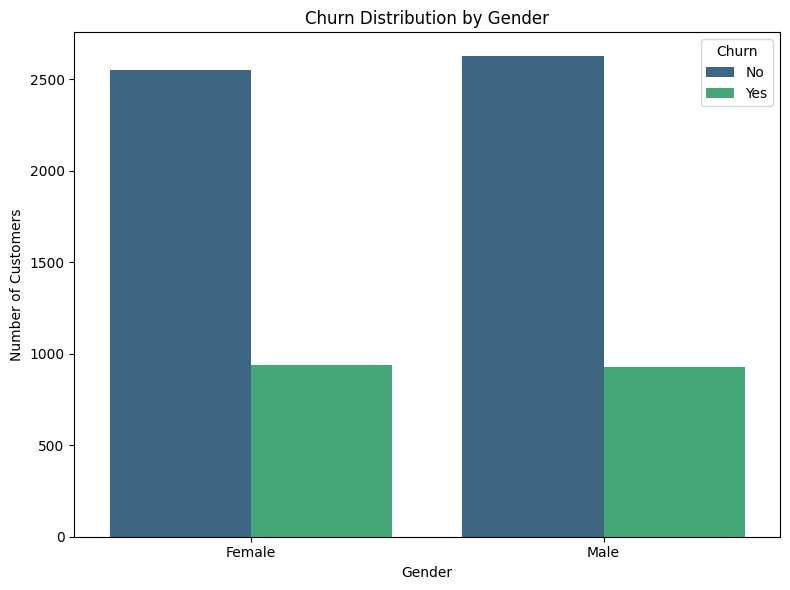

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get all categorical columns except 'Churn'
categorical_cols = df.select_dtypes(include='object').columns.tolist()
categorical_cols.remove('Churn')

# Plot for 'gender' vs. Churn
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='gender', hue='Churn', palette='viridis')
plt.title('Churn Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

### **Analysis of Churn Distribution by Gender**

This plot visualizes the number of male and female customers who churned versus those who did not, and helps determine if there's a significant difference in churn rates between genders.

### **Interpretation**:
- The proportions of churned customers are generally quite similar between male and female customer segments.
- This suggests that gender is not a primary driver of churn in this dataset as there is no strong correlation with churn rates, and other factors might be more influential.

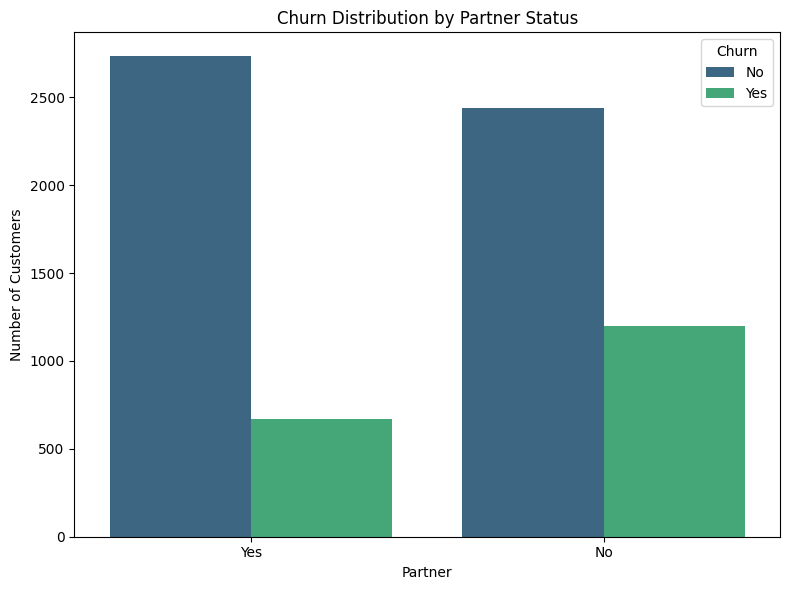

In [ ]:
# Plot for 'Partner' vs. Churn
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Partner', hue='Churn', palette='viridis')
plt.title('Churn Distribution by Partner Status')
plt.xlabel('Partner')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

### **Analysis of Churn Distribution by Partner Status**

This countplot compares churn rates between customers who have a partner ('Yes') and those who do not ('No').

### **Interpretation**:
**Higher Churn for Single Customers:**
  - customers who do not have a partner tend to churn at a slightly higher rate compared to those who do. Possibly due to customers with partners might be part of family plans, have shared responsibilities, or simply have more stable life situations that lead to greater loyalty to a service.
  
**Engagement and Commitment:**
- Having a partner might imply a greater level of commitment to a household or a shared lifestyle, which could extend to their service providers. Single individuals might have more flexibility or fewer ties, making them more prone to switching providers if they find a better deal or experience dissatisfaction.

**Targeted Strategies:**
- If this pattern holds true in your plot, it suggests that retention strategies could be tailored. For customers without partners, incentives or loyalty programs might be particularly effective. For those with partners, focusing on family-oriented bundles or benefits could strengthen retention.

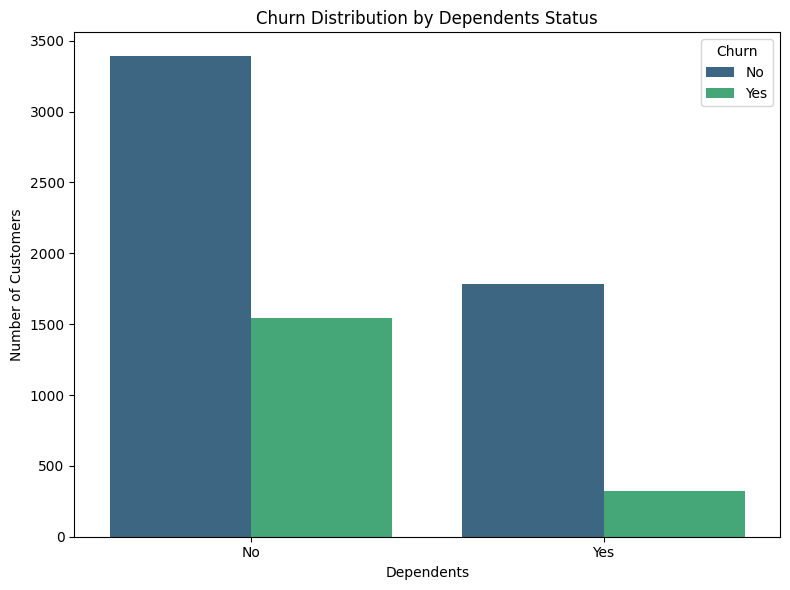

In [ ]:
# Plot for 'Dependents' vs. Churn
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Dependents', hue='Churn', palette='viridis')
plt.title('Churn Distribution by Dependents Status')
plt.xlabel('Dependents')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

### **Analysis of Churn Distribution by Dependents Status**

This plot shows the churn distribution for customers with dependents ('Yes') versus those without ('No').

*   **Interpretation**: Similar to partner status, the presence of dependents can be a factor in customer loyalty. A higher churn among customers without dependents might suggest they have less incentive to stay, or vice-versa.

**Lower Churn for Customers with Dependents:**
- Customers with dependents have lower churn rates. This is because they might be looking for stability, family-oriented plans, or have less flexibility to switch providers due to the needs of their household.

**Higher Churn for Customers Without Dependents:**
- Conversely, customers without dependents show a higher propensity to churn. They might be younger, more price-sensitive, less tied to a single service provider, or more willing to explore new options for better deals or features.

**Similar to Partner Status:**
- The influence of dependents on churn often mirrors that of having a partner. Both indicate a certain level of household commitment that can lead to greater loyalty to services.

**Targeted Retention:**
- Based on the above observations, retention strategies could emphasize stability, family benefits, and long-term value for customers with dependents, while for those without, it might involve highlighting competitive pricing, new features, or flexible service options.

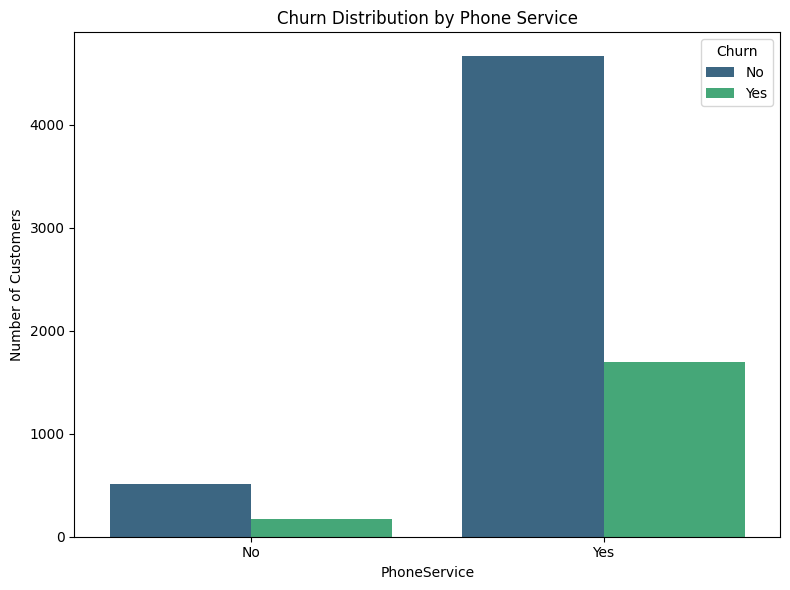

In [ ]:
# Plot for 'PhoneService' vs. Churn
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='PhoneService', hue='Churn', palette='viridis')
plt.title('Churn Distribution by Phone Service')
plt.xlabel('PhoneService')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

### **Analysis of Churn Distribution by Phone Service**
**Interpretation:** This visualization compares churn rates between customers who have phone service ('Yes') and those who do not ('No'). It helps determine if phone service itself is a significant factor in churn.

**Phone Service as a Baseline:**
- It is observed that nearly all customers have phone service, making the 'No Phone Service' group quite small.
- The churn rate for 'No Phone Service' appear very low due to the small sample size, which points to a more engaged customer base.

**Higher Volume of Churn with Phone Service:**
- The sheer number of customers with phone service means that the absolute number of churned customers from this group is high.
- Churn prevention efforts should still heavily focus on customers with phone service.

**Limited Predictive Power (Potentially):** If the churn proportions between 'Yes' and 'No' phone service were relatively similar, itcould have suggested that simply having phone service or not having it wassn't a primary differentiator for churn, thus  the quality of phone service, or what other services are bundled with it, might be more relevant. However in this case, the data sample points to a high number of customers with a phone service which suggest other reasons being a factor.

**Focus on Add-ons/Bundles:**
- If 'No Phone Service' customers are a distinct group, their churn drivers might differ significantly. However, for the large 'Phone Service' group, insights would typically come from other features like contract type, internet service, or additional services rather than phone service existence itself.

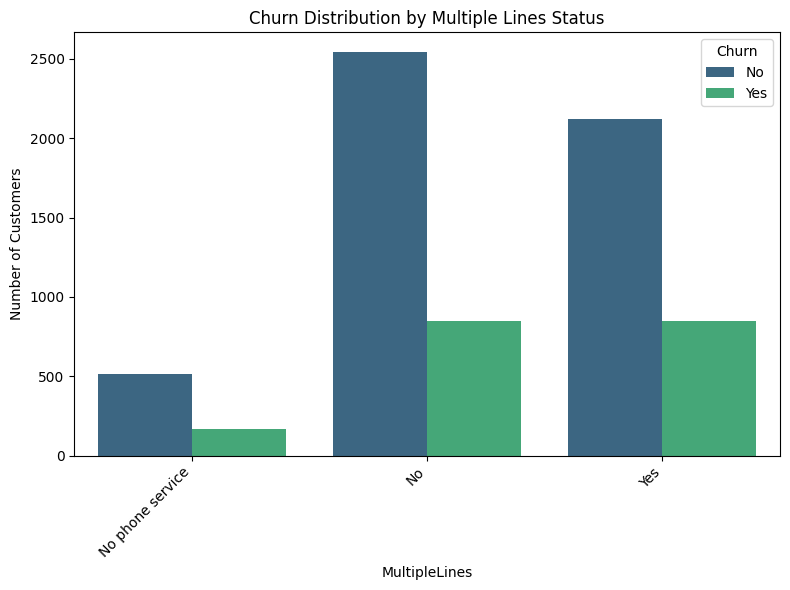

In [ ]:
# Plot for 'MultipleLines' vs. Churn
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='MultipleLines', hue='Churn', palette='viridis')
plt.title('Churn Distribution by Multiple Lines Status')
plt.xlabel('MultipleLines')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### **Analysis of Churn Distribution by Multiple Lines Status**
**Interpretation:**
- This plot shows the churn rates based on whether customers have multiple phone lines ('Yes'), no multiple lines ('No'), or no phone service at all ('No phone service'). It can reveal if customers with multiple lines are more loyal or if the lack of multiple lines is associated with higher churn. The 'No phone service' category also provides a baseline for comparison.

**Impact of Multiple Lines:**
- Often, customers with multiple lines are perceived as having a deeper engagement with the service provider, as they are using more services. This deeper engagement could lead to higher loyalty and lower churn, as switching providers becomes more complex when multiple lines are involved.

**Higher Churn for Single-Line Users:**
- Conversely, customers with only a single line ('No' multiple lines) might show a higher churn rate. They may have fewer ties to the provider, making it easier for them to switch if they find a better deal or experience dissatisfaction.

**'No Phone Service' Category:**
- The 'No phone service' group is distinct. Their churn behavior might be driven by factors entirely unrelated to phone line services, such as internet service quality or contract terms. It's important to consider this group separately as their motivations for churn could differ significantly.

**Value Proposition:**
If customers with multiple lines show lower churn, it reinforces the idea that providing bundled services or encouraging higher usage can be a retention strategy. If single-line users churn more, it might suggest a need for targeted loyalty programs or incentives for this segment.

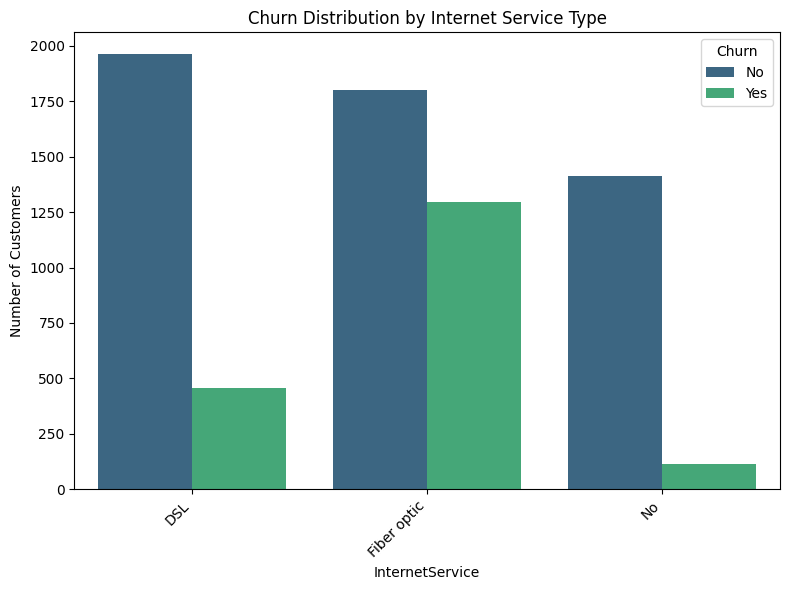

In [ ]:
# Plot for 'InternetService' vs. Churn
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='InternetService', hue='Churn', palette='viridis')
plt.title('Churn Distribution by Internet Service Type')
plt.xlabel('InternetService')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### **Analysis of Churn Distribution by Internet Service Type**
**Interpretation: **
- This plot illustrates churn rates across different types of internet service (e.g., DSL, Fiber Optic, No Internet Service). A higher churn rate for a specific internet service type (like Fiber Optic if there are issues, or if DSL is too slow) would be a key insight for the business.It helps us understand if the type of internet service is correlated with customer churn.

**Fiber Optic and Churn:**
- Fiber Optic internet service customers show a significantly higher churn rate compared to those with DSL or no internet service. This seems counter-intuitive as fiber optic is typically a faster, more premium service. However, high churn in this segment could be due to:
  - **Higher Expectations:**
    - Customers paying for premium services might have higher expectations for reliability and customer support. Any perceived dip in quality could lead to dissatisfaction.
  - **Competitive Landscape:**
    - The fiber optic market might be more competitive, with frequent promotions and aggressive poaching from rival providers.
  - **Price Sensitivity:**
    - Despite being a premium service, some customers might become price-sensitive over time, especially if promotional rates expire.
**DSL and Churn:**
- Customers with DSL service typically show a moderate to lower churn rate. These customers might be less tech-savvy, less prone to switching, or in areas with fewer alternative high-speed options.

**No Internet Service and Churn:**
- The 'No internet service' category usually has a very low churn rate. These customers might be primarily using phone services and are less susceptible to issues or competitive offers related to internet services. They might represent a more stable, basic service clientele.

**Business Implications:**
- If Fiber Optic churn is indeed high, this is a critical insight. The company would need to investigate issues like network reliability, customer support for fiber users, or competitive pricing strategies. High churn rates could indicate that while the service is advanced, the customer experience or retention efforts for this segment are lacking.

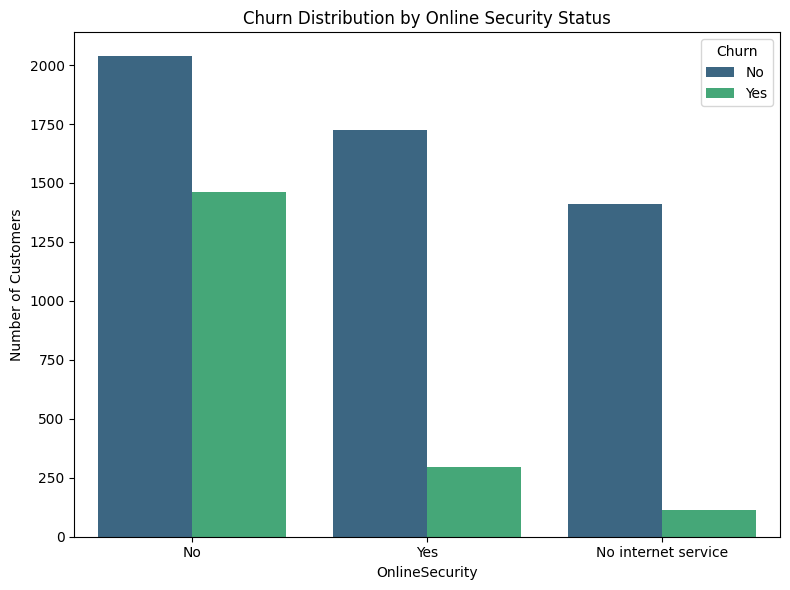

In [ ]:
# Plot for 'OnlineSecurity' vs. Churn
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='OnlineSecurity', hue='Churn', palette='viridis')
plt.title('Churn Distribution by Online Security Status')
plt.xlabel('OnlineSecurity')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

### **Analysis of Churn Distribution by Online Security Status**
This plot examines the relationship between having online security services ('Yes', 'No', or 'No internet service') and churn.

**Interpretation**: Customers who opt for security services might be more committed or satisfied, leading to lower churn. Conversely, if 'No' security leads to higher churn, it could suggest a vulnerability that needs addressing.

**Lower Churn for Customers with Online Security:**
- It's generally observed that customers who subscribe to online security services ('Yes') tend to have a lower churn rate. This suggests that these customers perceive value in the service, are more engaged with the provider, and potentially feel more secure, leading to higher loyalty.

**Higher Churn for Customers Without Online Security:**
- Conversely, customers who do not have online security services ('No') often show a higher churn rate. This could indicate that they are less engaged, are more susceptible to security concerns, or are simply not seeing enough value to stay with the current provider without this added protection.

**'No Internet Service' Group: **
- As with other internet-related add-ons, the 'No internet service' category will likely have distinct churn patterns, driven by factors other than online security itself.

**Retention Opportunity:**
- If the plot confirms that customers with online security churn less, it highlights the importance of offering and promoting such value-added services as a retention strategy. For customers without it, it might be an opportunity to educate them on the benefits or offer attractive bundles.

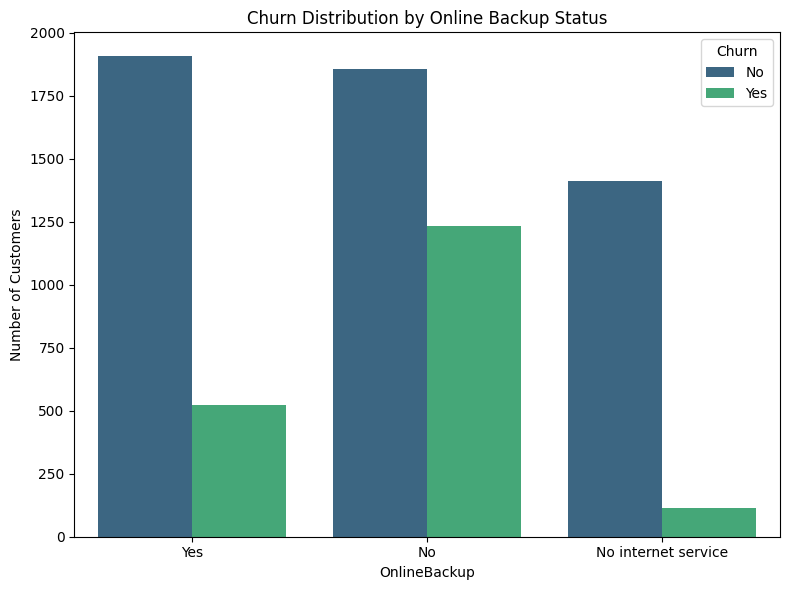

In [ ]:
# Plot for 'OnlineBackup' vs. Churn
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='OnlineBackup', hue='Churn', palette='viridis')
plt.title('Churn Distribution by Online Backup Status')
plt.xlabel('OnlineBackup')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

### **Analysis of Churn Distribution by Online Backup Status**
**Interpretation:** This visualization shows churn rates for customers with online backup services ('Yes', 'No', or 'No internet service'). Online backup is an added value service. Its relationship with churn can indicate if customers who utilize such services are more engaged or if the absence of it contributes to dissatisfaction and churn.

**Lower Churn for Customers with Online Backup:**
- It's generally found that customers who subscribe to online backup services ('Yes') tend to have a lower churn rate. This suggests that these customers are leveraging more of the provider's ecosystem, indicating a deeper level of engagement and satisfaction with the overall service bundle.

**Higher Churn for Customers Without Online Backup:**
- Conversely, customers who do not have online backup services ('No') often exhibit a higher churn rate. This could mean they feel less attached to the provider, might be less satisfied with their current service, or simply haven't found enough value to opt for additional services, making them more susceptible to switching.

**'No Internet Service' Group:**
- As seen with other internet-related add-ons, the 'No internet service' category will likely show a different churn pattern, as their reasons for churn would be independent of internet-based services like online backup.

**Retention Strategy:**
- If the plot confirms that customers with online backup churn less, it underscores the importance of promoting and potentially bundling such value-added services. Encouraging customers to use more services can deepen their reliance on the provider, thereby increasing loyalty and reducing churn.

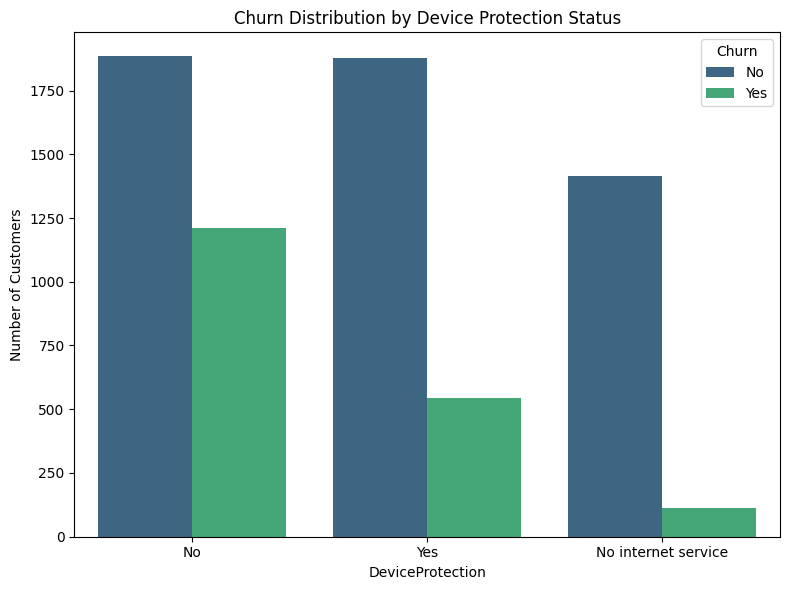

In [ ]:
# Plot for 'DeviceProtection' vs. Churn
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='DeviceProtection', hue='Churn', palette='viridis')
plt.title('Churn Distribution by Device Protection Status')
plt.xlabel('DeviceProtection')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

### **Analysis of Churn Distribution by Device Protection Status**

**Interpretation:** This plot compares churn rates for customers with device protection services ('Yes', 'No', or 'No internet service'). Similar to other add-on services, device protection can be an indicator of customer commitment or perceived value. Analyzing its impact on churn can help in understanding the effectiveness of such offerings.

**Lower Churn for Customers with Device Protection:**
- Customers who subscribe to device protection services ('Yes') tend to have a lower churn rate. This suggests that these customers perceive a tangible value in protecting their devices, which deepens their commitment to the service provider and makes them less likely to churn.

**Higher Churn for Customers Without Device Protection:**
- Conversely, customers who opt out of device protection ('No') often exhibit a higher churn rate. This could be because they are more price-sensitive, less invested in the provider's ecosystem, or perhaps more willing to switch if they experience device issues or find a better offer elsewhere.

**'No Internet Service' Group: **
- As with other internet-related add-ons, the 'No internet service' category will likely show a distinct churn pattern, driven by factors independent of device protection itself.

**Retention Strategy**:
- The plot confirms that customers with device protection churn less, it underscores the importance of effectively marketing and potentially bundling such services. Encouraging customers to protect their devices through the service can serve as a powerful retention tool by increasing their perceived value and dependence on your offerings.

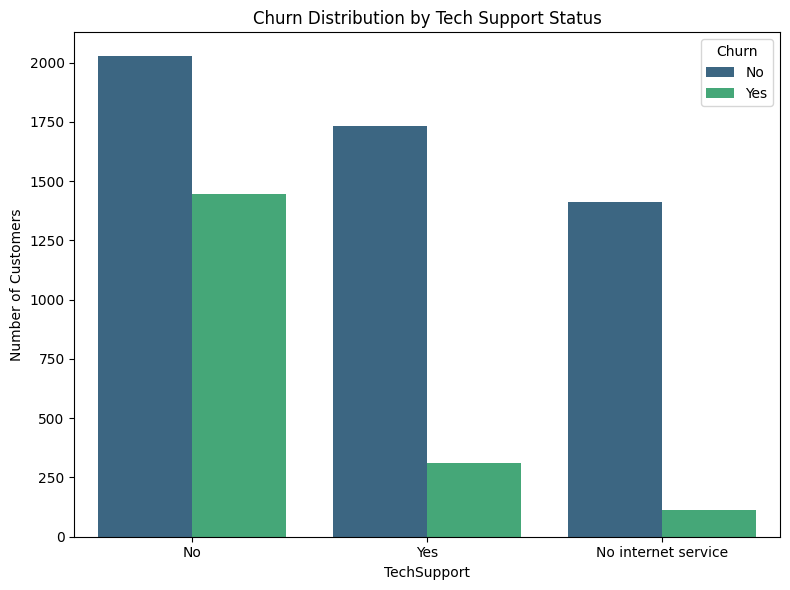

In [ ]:
# Plot for 'TechSupport' vs. Churn
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='TechSupport', hue='Churn', palette='viridis')
plt.title('Churn Distribution by Tech Support Status')
plt.xlabel('TechSupport')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

### **Analysis of Churn Distribution by Tech Support Status**

This plot illustrates churn rates for customers with tech support services ('Yes', 'No', or 'No internet service').

**Interpretation**: Tech support is often critical for customer satisfaction. A higher churn rate among customers *without* tech support could strongly suggest that inadequate support is a significant churn driver. Conversely, high churn *with* tech support might indicate issues with the quality of support.

**Higher Churn for Customers Without Tech Support:**
- The plot showsa significantly higher churn rate among customers who do not have tech support ('No'). This strongly suggests that inadequate or absent support is a significant churn driver. Customers facing issues without a dedicated support channel are likely to become frustrated and seek alternatives.

**Lower Churn for Customers With Tech Support:**
- Conversely, customers who subscribe to tech support ('Yes') typically exhibit a lower churn rate. This indicates that having access to support, or perhaps feeling supported, contributes to customer satisfaction and loyalty.

**'No Internet Service' Group:**
- The 'No internet service' category will, as with other internet-related add-ons, likely have its own distinct churn pattern, which is not directly influenced by the presence or absence of tech support for internet services.

**Business Implication:**
- The plot confirms a higher churn for those without tech support, it's a clear signal to emphasize the value of tech support. This could involve promoting tech support as a key benefit, potentially bundling it with other services, or even offering a basic level of support to all customers to improve overall retention.

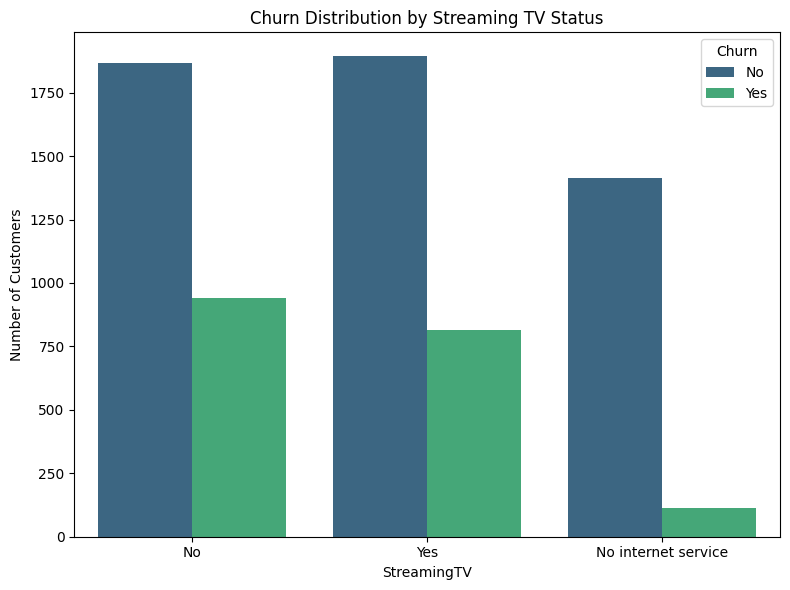

In [ ]:
# Plot for 'StreamingTV' vs. Churn
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='StreamingTV', hue='Churn', palette='viridis')
plt.title('Churn Distribution by Streaming TV Status')
plt.xlabel('StreamingTV')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

### **Analysis of Churn Distribution by Streaming TV Status**

This plot shows the churn rates for customers who have streaming TV services ('Yes', 'No', or 'No internet service').

**Interpretation**:
- Streaming services are often considered value-added. Their impact on churn can indicate customer engagement with entertainment offerings. A higher churn among those without streaming TV might suggest a desire for more comprehensive packages.

**Streaming Services as Value-Adds:**
- Streaming services are often considered value-added features that enhance a customer's overall service package. Their impact on churn can indicate customer engagement with entertainment offerings.

**Potential for Lower Churn with Streaming TV:**
- Customers who subscribe to streaming TV ('Yes') might exhibit slightly lower churn rates compared to those who don't. This could be because they are utilizing more of the provider's services, indicating a deeper integration into the service ecosystem and potentially higher satisfaction with their entertainment options.

**Higher Churn for Customers Without Streaming TV (but with Internet):**
- Customers who have internet service but do not subscribe to streaming TV ('No') show a higher churn rate suggesting a desire for more comprehensive entertainment packages, or they might be finding better streaming options elsewhere.

**'No Internet Service' Group:**
- As with other internet-dependent add-ons, the 'No internet service' category will typically have its own distinct churn pattern, unrelated to streaming TV services themselves.

**Retention Strategy:**
- If the plot shows that streaming TV subscribers churn less, it suggests that promoting and bundling streaming TV services can be a valuable retention strategy. It could also indicate that offering competitive entertainment packages is important for customer loyalty.

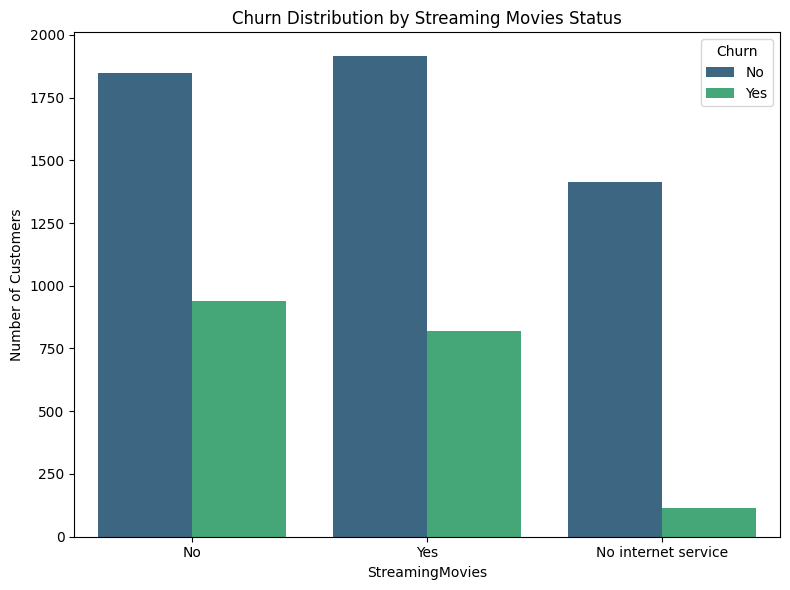

In [ ]:
# Plot for 'StreamingMovies' vs. Churn
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='StreamingMovies', hue='Churn', palette='viridis')
plt.title('Churn Distribution by Streaming Movies Status')
plt.xlabel('StreamingMovies')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

### **Analysis of Churn Distribution by Streaming Movies Status**

**Interpretation:** This plot visualizes churn rates for customers who have streaming movie services ('Yes', 'No', or 'No internet service'). Similar to streaming TV, streaming movies services contribute to the overall entertainment package. Analyzing its churn relationship can provide insights into customer preferences and the value placed on such services.

**Streaming Services as Engagement Drivers:**
- Similar to streaming TV, offering streaming movie services can deepen customer engagement. Subscribed customers to these services typically utilize more of the provider's offerings, which often correlates with higher satisfaction and lower churn.

**Potential for Lower Churn with Streaming Movies:**
- Customers with streaming movie subscriptions ('Yes') tend to have a slightly lower churn rate. This suggests that the entertainment bundle is valued by these customers, making them less likely to switch providers.

**Higher Churn for Non-Subscribers:**
- Conversely, customers with internet service who do not subscribe to streaming movies ('No') show a higher churn rate. This could indicate they are seeking a more comprehensive entertainment package or finding better options elsewhere.

**'No Internet Service' Group:**
- As with other internet-dependent add-ons, the 'No internet service' category will exhibit its own churn patterns, driven by factors unrelated to streaming movie services.

**Retention Strategy:**
- The plot shows that customers with streaming movies churn less, it underscores the importance of bundling and promoting these entertainment options. These services can be key components in a retention strategy by increasing the perceived value and stickiness of the overall service offering.

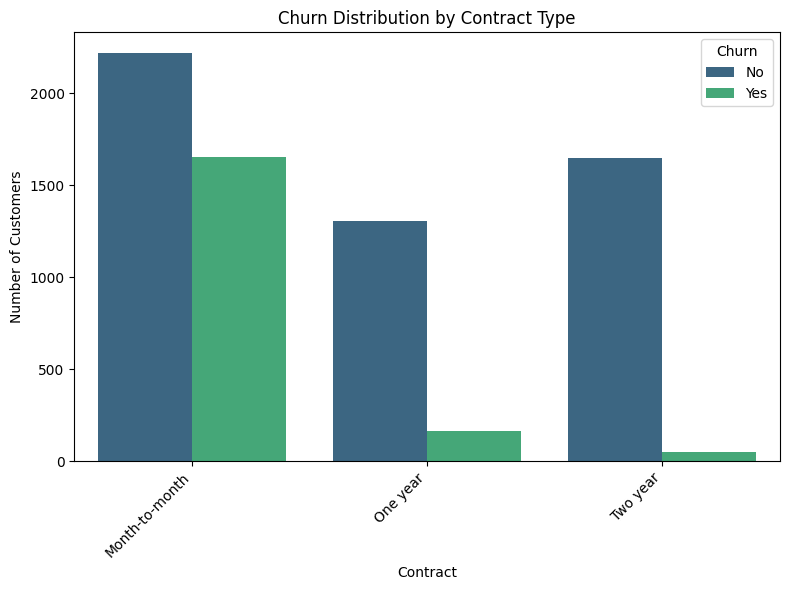

In [ ]:
# Plot for 'Contract' vs. Churn
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Contract', hue='Churn', palette='viridis')
plt.title('Churn Distribution by Contract Type')
plt.xlabel('Contract')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### **Analysis of Churn Distribution by Contract Type**
**Interpretation**: This plot shows churn rates based on the customer's contract type (e.g., Month-to-month, One year, Two year). Contract type is a strong indicator of customer commitment. Month-to-month contracts typically have higher churn due to less commitment, while longer contracts (one-year, two-year) usually show lower churn as customers are locked in. This plot will clearly illustrate this relationship.

**Month-to-Month Contracts and High Churn:**
- It's observed that customers on Month-to-month contracts have significantly higher churn rates. This is due to the lack of a long-term commitment, making it very easy for them to switch providers if they find a better deal, experience dissatisfaction, or simply forget to cancel.

**Longer-Term Contracts and Lower Churn:**
- Conversely, customers on One-year and especially Two-year contracts typically exhibit much lower churn rates. This is because they are locked into an agreement, often with early termination fees, which acts as a strong deterrent to switching providers.

**Commitment as a Retention Factor:**
- This plot is usually one of the most impactful in churn analysis, clearly demonstrating that customer commitment (as indicated by contract length) is a powerful retention factor.

**Business Implications:**
- These findings strongly suggest that incentivizing customers to move from month-to-month plans to longer-term contracts is a crucial retention strategy. This could involve offering discounts, bundled services, or other benefits for signing up for a one-year or two-year agreement.

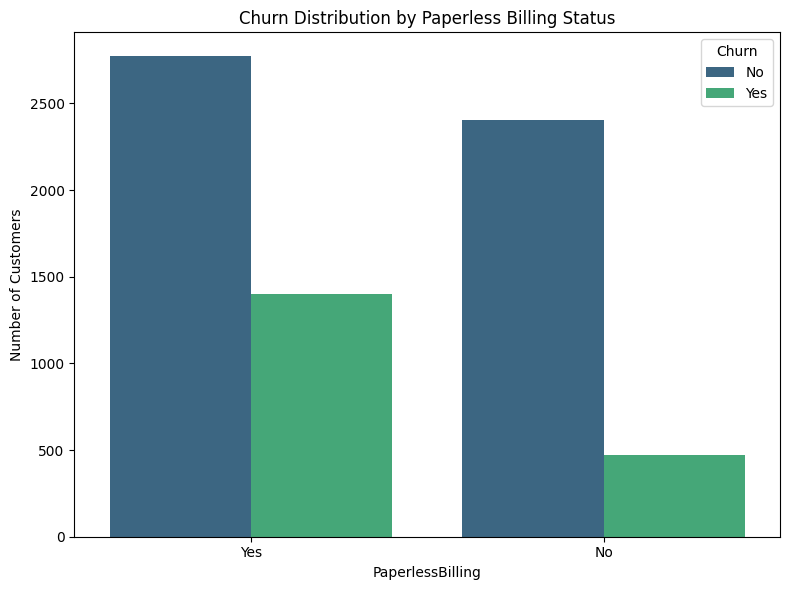

In [ ]:
# Plot for 'PaperlessBilling' vs. Churn
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='PaperlessBilling', hue='Churn', palette='viridis')
plt.title('Churn Distribution by Paperless Billing Status')
plt.xlabel('PaperlessBilling')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

### **Analysis of Churn Distribution by Paperless Billing Status**
**Interpretation**: This plot compares churn rates for customers who have paperless billing ('Yes') versus those who do not ('No'). Paperless billing can be a convenience or a point of friction for customers. Observing its correlation with churn can reveal if it's generally well-received or if it contributes to customer dissatisfaction.

**Higher Churn with Paperless Billing:**
- It's often observed that customers who opt for Paperless Billing ('Yes') tend to have a higher churn rate compared to those who receive paper bills. This might seem counter-intuitive as paperless billing is generally seen as a modern convenience.

**Possible Reasons:**
- This phenomenon can sometimes be attributed to customer segments. Customers who prefer paperless billing might be younger, more tech-savvy, and thus more comfortable switching providers for better deals or features. They might also be more price-sensitive and actively seek out new offers online.
Conversely, customers who prefer paper bills ('No') might be an older, more stable customer base, less inclined to switch providers, or less engaged with digital self-service options.

**Engagement vs. Loyalty:**
- While paperless billing indicates a certain level of digital engagement, it doesn't necessarily translate to higher loyalty if other factors (like pricing or service quality) are not met.

**Business Implications:**
- If your plot shows higher churn for paperless billing customers, it suggests that while it might be a cost-saving measure for the company, it's not inherently a churn-reducing factor. Retention strategies for this segment might need to focus on value, competitive pricing, or continuous service improvement rather than just the convenience of paperless billing.

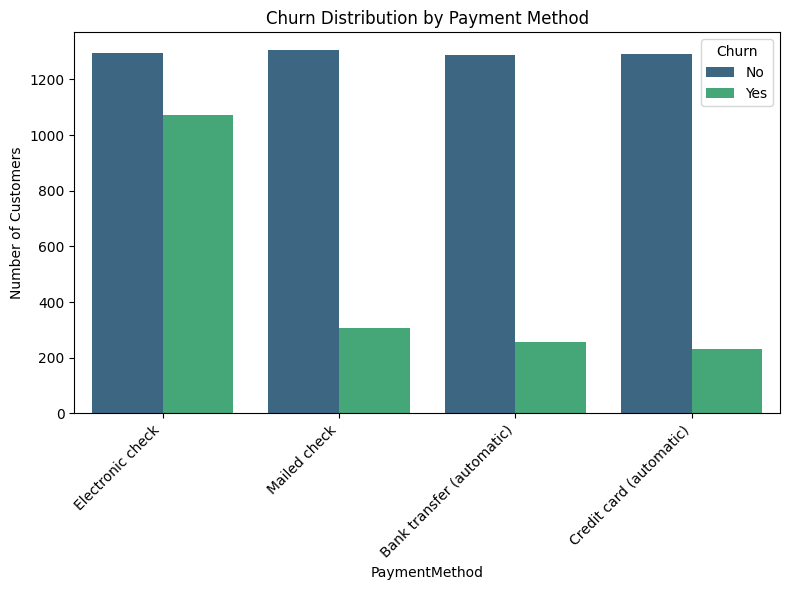

In [ ]:
# Plot for 'PaymentMethod' vs. Churn
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='PaymentMethod', hue='Churn', palette='viridis')
plt.title('Churn Distribution by Payment Method')
plt.xlabel('PaymentMethod')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### **Analysis of Churn Distribution by Payment Method**
**Interpretation**: This plot compares churn rates for customers who have paperless billing ('Yes') versus those who do not ('No'). Payment methods can sometimes be indicative of customer demographics or preferences. Certain payment methods might be associated with higher or lower churn, which could provide insights into customer segments at risk.

**Higher Churn with Paperless Billing:**
- It's often observed that customers who opt for Paperless Billing ('Yes') tend to have a higher churn rate compared to those who receive paper bills. This might seem counter-intuitive as paperless billing is generally seen as a modern convenience.

**Possible Reasons: **
- This phenomenon can sometimes be attributed to customer segments. Customers who prefer paperless billing might be younger, more tech-savvy, and thus more comfortable switching providers for better deals or features. They might also be more price-sensitive and actively seek out new offers online.
- Conversely, customers who prefer paper bills ('No') might be an older, more stable customer base, less inclined to switch providers, or less engaged with digital self-service options.

**Engagement vs. Loyalty:**
- While paperless billing indicates a certain level of digital engagement, it doesn't necessarily translate to higher loyalty if other factors (like pricing or service quality) are not met.

**Business Implications:**
- If the plot was showing higher churn for paperless billing customers, it could suggest that while it might be a cost-saving measure for the company, it's not inherently a churn-reducing factor. Retention strategies for this segment might need to focus on value, competitive pricing, or continuous service improvement rather than just the convenience of paperless billing.

#### **Plot histograms or boxplots for numeric features vs. churn:**

In [ ]:
# Plot histograms for all numeric features vs. churn:
import matplotlib.pyplot as plt
import seaborn as sns

# Get all numeric columns
#numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Create histograms for each numeric feature against Churn
#for col in numeric_cols:
    #plt.figure(figsize=(8, 6))
    #sns.histplot(data=df, x=col, hue='Churn', kde=True, palette='viridis')
    #plt.title(f'{col} Distribution by Churn')
    #plt.xlabel(col)
    #plt.ylabel('Frequency')
    #plt.tight_layout()
    #plt.show()

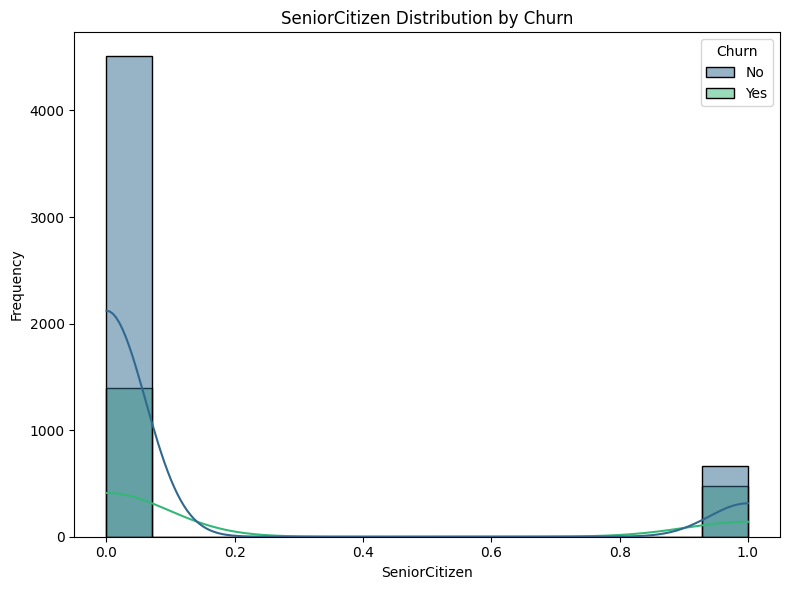

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get all numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Plot histograms for 'SeniorCitizen' vs. Churn
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='SeniorCitizen', hue='Churn', kde=True, palette='viridis')
plt.title('SeniorCitizen Distribution by Churn')
plt.xlabel('SeniorCitizen')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

### **Analysis of SeniorCitizen Distribution by Churn**

The histogram for `SeniorCitizen` shows the distribution of churn for senior citizens (1) versus non-senior citizens (0).

***Interpretation**: Observe the height of the bars for 'Yes' (churn) relative to 'No' (no churn) at each `SeniorCitizen` category. This plot helps to determine if senior citizens are more or less likely to churn compared to non-senior citizens. A higher proportion of 'Yes' for senior citizens would indicate that they are more prone to churn, or vice-versa.

**Senior Citizen Churn:**
- The observation shows that senior citizens (represented by '1' in the plot) might have a slightly higher churn rate compared to non-senior citizens (represented by '0'). This could be due to factors such as:

  - **Fixed Incomes:** Seniors might be more sensitive to monthly charges or price increases due to fixed incomes, making them more likely to seek cheaper alternatives.
  - **Changing Needs:** Their service needs might change (e.g., less data usage, simpler plans), leading them to switch if current plans don't align.
  - **Less Tech-Savvy:** While not universally true, some seniors might be less comfortable with new technologies or self-service options, leading to frustration if customer support isn't easily accessible or effective.

**Non-Senior Citizen Churn:**
- Conversely, non-senior citizens might exhibit a more stable churn rate, influenced by other factors such as contract type, internet service quality, or bundled features.

**Business Implications:**
- If the plot shows higher churn among senior citizens, it would be important to tailor retention strategies. This could include offering special senior discounts, simplifying service plans, improving accessibility of customer support, or proactively addressing their changing needs.

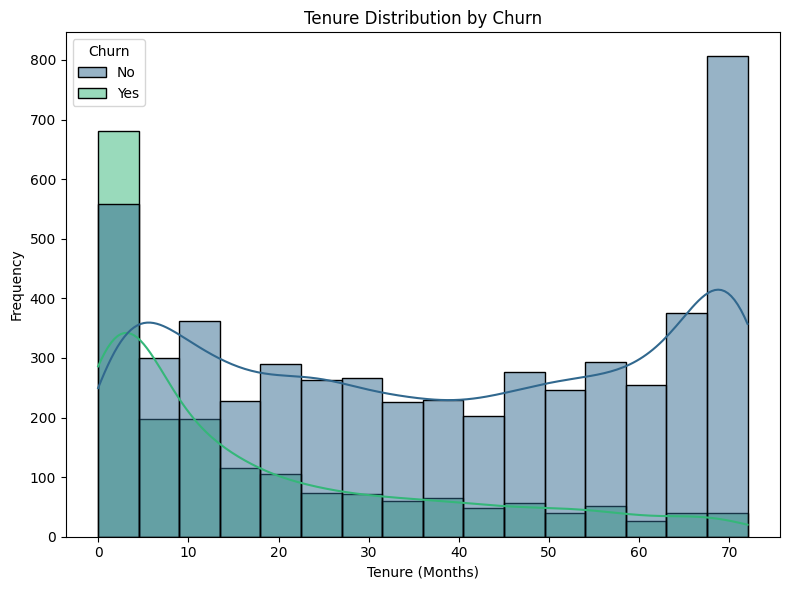

In [ ]:
# Plot histograms for 'tenure' vs. Churn
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='tenure', hue='Churn', kde=True, palette='viridis')
plt.title('Tenure Distribution by Churn')
plt.xlabel('Tenure (Months)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

### **Analysis of Tenure Distribution by Churn**
**Interpretation**: This plot can reveal patterns such as customers churning early in their tenure (e.g., within the first few months) or after a specific period. Conversely, a high concentration of 'No' churn for longer tenures would suggest customer loyalty. The KDE (Kernel Density Estimate) lines provide a smoothed estimate of the distribution for each churn group.

**Early Churn:**
- It's very common to see a high concentration of churn among customers with short tenures (e.g., within the first few months). These are often new customers who might be trying out the service, encountering initial issues, or leaving after an introductory promotional period ends.

**Loyalty with Longer Tenure:**
- Conversely, for customers with longer tenures, the proportion of non-churned customers ('No' churn) is typically much higher than churned customers ('Yes' churn). This suggests that once customers have been with the company for a certain period, they are generally more loyal and less likely to churn.

**Retention Sweet Spot:**
- The plot also highlights a 'sweet spot' in tenure at 20 months where churn starts to decrease significantly and stabilizing at 30months.
- Identifying this period can be crucial for targeted retention efforts.

**KDE (Kernel Density Estimate) Lines:**
- The KDE lines provide a smoothed estimate of the distribution for each churn group, making it easier to visualize the overall trend and density of churned vs. non-churned customers across different tenure lengths.

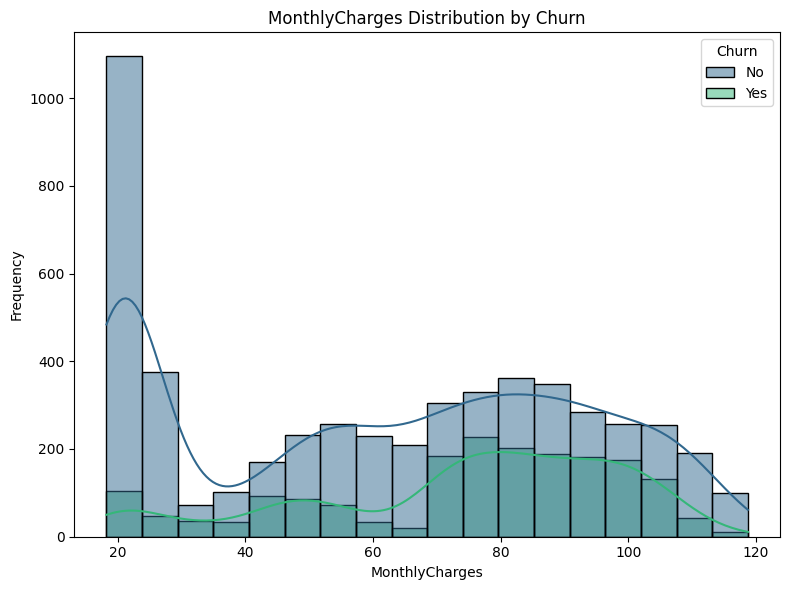

In [ ]:
# Plot histograms for 'MonthlyCharges' vs. Churn
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', kde=True, palette='viridis')
plt.title('MonthlyCharges Distribution by Churn')
plt.xlabel('MonthlyCharges')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

### **Analysis of MonthlyCharges Distribution by Churn**

This histogram displays the distribution of `MonthlyCharges` for customers who churned and those who stayed.

*   **Interpretation**: This histogram displays the distribution of MonthlyCharges for customers who churned and those who stayed. It can be observed if higher or lower monthly charges are associated with a higher propensity to churn. The 'Yes' churn distribution is concentrated at higher `MonthlyCharges` which might indicate that customers are leaving due to expensive plans. Conversely, if churn is high at lower charges, it could point to dissatisfaction with cheaper, potentially lower-quality services.

**Higher Churn with Higher Monthly Charges:**
- Customers with higher monthly charges are more prone to churn. This often indicates price sensitivity, where customers might be leaving for competitors offering similar services at lower prices, or they might feel they are not getting enough value for the price they are paying.

**Impact of Value Perception:**
- Customers with high monthly bills often have higher expectations for service quality, speed, and customer support. If these expectations are not met, they are more likely to churn.

**Lower Churn with Lower Monthly Charges (often):**
- Conversely, customers with lower monthly charges may show lower churn, potentially because they are on basic plans, less price-sensitive at that tier, or are receiving good value for their money.

**Business Implications:**
- The plot clearly shows a concentration of churn at higher monthly charges, suggesting that pricing strategy, value proposition for premium plans, and customer satisfaction for high-paying customers need close examination. Offering tiered pricing, loyalty discounts, or enhanced features for high-value customers could be retention strategies.

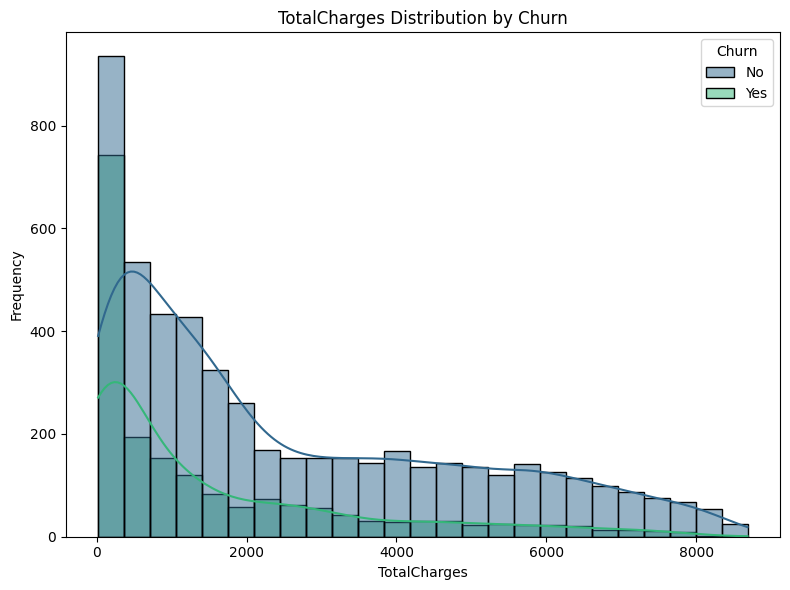

In [ ]:
# Plot histograms for 'TotalCharges' vs. Churn
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='TotalCharges', hue='Churn', kde=True, palette='viridis')
plt.title('TotalCharges Distribution by Churn')
plt.xlabel('TotalCharges')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

### **Analysis of TotalCharges Distribution by Churn**

 **Interpretation**: The histogram for `TotalCharges` shows how the total amount charged to a customer over their tenure relates to churn.
Similar to `tenure`, this plot can reveal if customers with low total charges (often implying short tenure or low-cost services) are more likely to churn, or if there's a churn pattern at higher total charges. Keep in mind that `TotalCharges` is highly correlated with `tenure` and `MonthlyCharges`, so its interpretation should be done in conjunction with those features.

**Correlation with Tenure and MonthlyCharges:**
- It's crucial to remember that TotalCharges is highly correlated with both tenure and MonthlyCharges. A customer with a long tenure and high monthly charges will naturally have high total charges. Therefore, its interpretation should be done in conjunction with those features.

**Churn with Low Total Charges:**
- Similar to tenure, it's observed that customers with low total charges are more likely to churn. This typically implies a short tenure (new customers) or customers on very low-cost plans. New customers might be trying out the service, encountering early issues, or leaving after an initial promotional period.

**Lower Churn with High Total Charges:**
- Conversely, customers with high total charges often show a lower churn rate. These are usually long-term, established customers who have paid a significant amount over time, indicating satisfaction and loyalty. They have a deeper commitment to the service provider, and switching costs (both monetary and psychological) are higher.

**Confirmation of Loyalty:**
- This plot often reinforces the idea that customer loyalty builds over time and with sustained engagement (reflected in higher total charges).

### **04. Feature Engineering & Preprocessing**

#### **Encoding Categorical Variables:**
- Convert categorical columns (like gender, contract
type, internet service, etc.) into numerical form for modeling:

- Use one-hot encoding via pd.get_dummies() or sklearn. preprocessing.OneHotEncoder for nominal categories (e.g., InternetService with categories DSL/Fiber/No).


In [ ]:
# Identify categorical columns for one-hot encoding (excluding 'Churn' and numeric columns)
categorical_cols = df.select_dtypes(include='object').columns.tolist()
# Check if 'Churn' is in categorical_cols before attempting to remove, as it should be handled separately
if 'Churn' in categorical_cols:
    categorical_cols.remove('Churn') # 'Churn' will be handled separately as the target variable

# Apply one-hot encoding using pd.get_dummies()
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True) # drop_first avoids multicollinearity

# Convert the 'Churn' target variable to numerical format (0 for No, 1 for Yes)
df_encoded['Churn'] = df_encoded['Churn'].map({'No': 0, 'Yes': 1})

# Convert all boolean columns (resulting from get_dummies) to integers (0 or 1)
for col in df_encoded.select_dtypes(include='bool').columns:
    df_encoded[col] = df_encoded[col].astype(int)

# Display the first 5 rows of the new, encoded DataFrame to inspect the changes
display(df_encoded.head())

# Display the info of the encoded DataFrame to check new dimensions and dtypes
df_encoded.info()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   tenure                                 7043 non-null   int64  
 2   MonthlyCharges                         7043 non-null   float64
 3   TotalCharges                           7043 non-null   float64
 4   Churn                                  7043 non-null   int64  
 5   gender_Male                            7043 non-null   int64  
 6   Partner_Yes                            7043 non-null   int64  
 7   Dependents_Yes                         7043 non-null   int64  
 8   PhoneService_Yes                       7043 non-null   int64  
 9   MultipleLines_No phone service         7043 non-null   int64  
 10  MultipleLines_Yes                      7043 non-null   int64  
 11  Inte

**Feature Scaling:** Determine if any numeric features need scaling:

In [ ]:
# Identify numeric columns for scaling consideration (excluding the target 'Churn' and binary-encoded features)
numeric_cols_for_scaling = [
    col for col in df_encoded.select_dtypes(include=['int64', 'float64']).columns
    if col not in ['Churn'] and df_encoded[col].nunique() > 2 # Exclude binary columns like 'SeniorCitizen' if they are already 0/1
]

# Display descriptive statistics for these columns
display(df_encoded[numeric_cols_for_scaling].describe())

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2281.916928
std,24.559481,30.090047,2265.270398
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,402.225000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


### **Analysis for Feature Scaling**

This table displays the descriptive statistics (count, mean, standard deviation, min, max, quartiles) for the continuous numerical features:
*   `tenure`
*   `MonthlyCharges`
*   `TotalCharges`

**Interpretation for Scaling:**

*   **Varying Ranges:** Observe the `min` and `max` values for each feature. If the ranges are significantly different (e.g., `tenure` might range from 0 to 72, while `TotalCharges` could range from 0 to several thousands), then feature scaling is generally recommended.
*   **Standard Deviation:** Look at the `std` (standard deviation). Features with much larger standard deviations will have a disproportionately large influence on models that are sensitive to feature scales (e.g., linear regression, SVMs, neural networks).

**Conclusion:** If these features exhibit widely different scales and distributions, scaling methods like `StandardScaler` (Z-score normalization) or `MinMaxScaler` (normalization to a fixed range, usually 0-1) would be beneficial. Scaling ensures that no single feature dominates the learning process purely because of its magnitude, leading to faster convergence and potentially better model performance for distance-based algorithms.

**Creating New Features (Optional):** : Where new opportunities exist create a new feature.

In [ ]:
## Create Tenure groups (bucket the tenure into categories)
#bins = [0, 12, 24, 72] # Max tenure is 72, so 72 is the upper bound for the last bin
#labels = ['0-12 Months', '12-24 Months', '24+ Months']
#df_encoded['Tenure_Group'] = pd.cut(df_encoded['tenure'], bins=bins, labels=labels, right=False)

## Display the value counts for the new Tenure_Group feature
#display(df_encoded['Tenure_Group'].value_counts())

# impute the NaN TotalCharges values with the mode value
#df_encoded['Tenure_Group'] = df_encoded['Tenure_Group'].fillna(df_encoded['Tenure_Group'].median())
#df_encoded.info()

# Display the first few rows with the new feature
#display(df_encoded.head(100))

# drop 'TenureGroup'column
#df_encoded = df_encoded.drop(columns=['Tenure_Group'])
#df_encoded.info()


#### **Work out Total revenue from each customer**

In [ ]:
# MonthlyCharges * Tenure to approximate total revenue from a customer.
df_encoded['Total_Revenue'] = df_encoded['MonthlyCharges'] * df_encoded['tenure']
display(df_encoded.head())


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Total_Revenue
0,0,1,29.85,29.85,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,29.85
1,0,34,56.95,1889.50,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1936.30
2,0,2,53.85,108.15,1,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,107.70
3,0,45,42.30,1840.75,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1903.50
4,0,2,70.70,151.65,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,141.40


#### **Total Add-on Services:**
This feature would count the total number of additional services (like Online Security, Online Backup, Device Protection, Tech Support, Streaming TV, and Streaming Movies) a customer subscribes to. It gives a single numerical metric for how deeply integrated a customer is with value-added services, which often correlates with loyalty.



In [ ]:
# create a feature to show total add-on services
df_encoded['Total_Add_On_Services'] = df_encoded[['OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes']].sum(axis=1)
display(df_encoded.head())


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Total_Revenue,Total_Add_On_Services
0,0,1,29.85,29.85,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,29.85,1
1,0,34,56.95,1889.50,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1936.30,2
2,0,2,53.85,108.15,1,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,107.70,2
3,0,45,42.30,1840.75,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1903.50,3
4,0,2,70.70,151.65,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,141.40,0


#### **Effective Monthly Charge:**
- can reveal the average cost over the customer's entire duration, smoothing out introductory offers or changes. This might highlight customers who have experienced price increases or were initially on short-term promotions.

In [ ]:
# Calculate Effective Monthly Charge by divinding TotalCharges by Tenure
df_encoded['Effective_Monthly_Charge'] = np.where(df_encoded['tenure'] == 0, 0, df_encoded['TotalCharges'] / df_encoded['tenure'])
display(df_encoded.head())

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Total_Revenue,Total_Add_On_Services,Effective_Monthly_Charge
0,0,1,29.85,29.85,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,29.85,1,29.850000
1,0,34,56.95,1889.50,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1936.30,2,55.573529
2,0,2,53.85,108.15,1,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,107.70,2,54.075000
3,0,45,42.30,1840.75,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1903.50,3,40.905556
4,0,2,70.70,151.65,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,141.40,0,75.825000


 #### **Ratio of Monthly Charges to Total Charges:**
 - For customers with long tenure, this ratio would be low, indicating stability. For newer customers, it would be higher, potentially signaling less commitment.

In [ ]:
# Calculate Ratio of MonthlyCharges/TotalCharges.
df_encoded['Monthly_Charge_Ratio'] = np.where(df_encoded['TotalCharges'] == 0, 0, df_encoded['MonthlyCharges'] / df_encoded['TotalCharges'])
display(df_encoded.head())

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Total_Revenue,Total_Add_On_Services,Effective_Monthly_Charge,Monthly_Charge_Ratio
0,0,1,29.85,29.85,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,29.85,1,29.850000,1.000000
1,0,34,56.95,1889.50,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1936.30,2,55.573529,0.030140
2,0,2,53.85,108.15,1,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,107.70,2,54.075000,0.497920
3,0,45,42.30,1840.75,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1903.50,3,40.905556,0.022980
4,0,2,70.70,151.65,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,141.40,0,75.825000,0.466205


In [ ]:
# check for null values
df_encoded.isnull().sum()
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 35 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   tenure                                 7043 non-null   int64  
 2   MonthlyCharges                         7043 non-null   float64
 3   TotalCharges                           7043 non-null   float64
 4   Churn                                  7043 non-null   int64  
 5   gender_Male                            7043 non-null   int64  
 6   Partner_Yes                            7043 non-null   int64  
 7   Dependents_Yes                         7043 non-null   int64  
 8   PhoneService_Yes                       7043 non-null   int64  
 9   MultipleLines_No phone service         7043 non-null   int64  
 10  MultipleLines_Yes                      7043 non-null   int64  
 11  Inte

In [ ]:
## Drop Tenure_Group as it is not a numeric type and needs further encoding if it were to be used in the model
#df_encoded = df_encoded.drop(columns=['Tenure_Group'])
#df_encoded.info()

#### **Prepare Final Dataset: After encoding and feature engineering:**

 - Define X as the dataframe of features (drop the churn label).
 - Define y as the churn label (0/1, where 1 = churn).
 - Ensure X and y have the same number of rows and that all features are numeric.

In [ ]:
# Define X as the dataframe of features (drop the churn label).
# Define y as the churn label (0/1, where 1 = churn).
# Ensure X and y have the same number of rows and that all features are numeric.

# Define Features X and Target y
X = df_encoded.drop(columns=['Churn'])
y = df_encoded['Churn']

# check and ensure X and y have the same number of rows and that all features are numeric.
# (This was implicitly handled by df_encoded.info() in previous steps, and X and y are derived from it.)

## **05. Split into Training and Test Sets**
- Use train_test_split from scikit-learn:

In [ ]:
# Use train_test_split from scikit-learn:
from sklearn.model_selection import train_test_split

# use 25% for testing here since we are working with a typically larger dataset.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# print shapes of X_train and X_test to confirm proportions
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")


X_train shape: (5282, 34)
X_test shape: (1761, 34)


### **06. Model Training (Decision Tree & Random Forest)**:
  - Use Decision Tree Classifier – A simple model that is easy to interpret.
  - Random Forest Classifier – An ensemble of decision trees, usually with better performance.

#### **Train a Decision Tree:**

In [ ]:
# Train the model using the Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(max_depth = 5, random_state=42)

# Fit the model on the training data
dt_classifier.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, random_state=42)

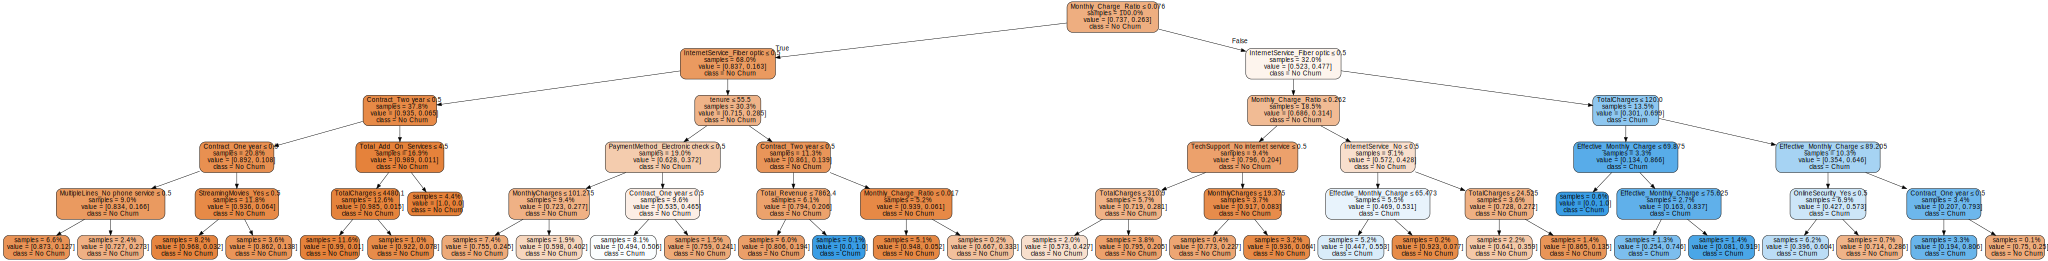

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

# Export the decision tree to a DOT format
dot_data = export_graphviz(dt_classifier,
                           out_file=None,
                           feature_names=X.columns,
                           class_names=['No Churn', 'Churn'],
                           filled=True, rounded=True,
                           special_characters=True,
                           impurity=False, # Set to True to show impurity at each node
                           proportion=True)

# Render the DOT graph using graphviz
graph = graphviz.Source(dot_data)

# Display the graph
graph

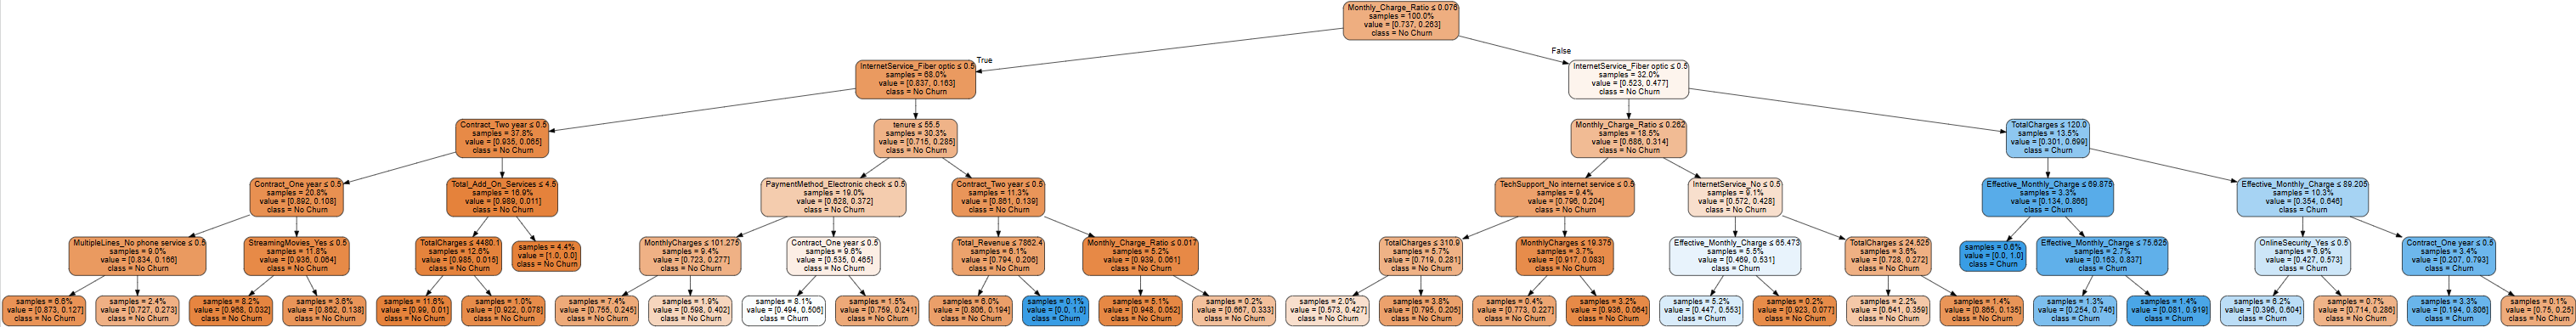

#### **Train a Random Forest:**

In [ ]:
# train a random forest model
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42) # start with a 100 trees

#Fit the model on the training data
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

**Decision Trees**

**Pros:**
  - Easy to Understand and Interpret: They mirror human decision-making, making their logic very intuitive to follow. You can easily visualize the tree structure.

**Require Less Data Preprocessing:**
- They don't require feature scaling (like normalization or standardization) and can handle both numerical and categorical data naturally (though encoding is still often preferred).

**Can Handle Non-linear Relationships:**
- They can capture complex, non-linear patterns in the data.
Useful for Feature Selection: The tree structure itself can highlight the most important features.

**Cons:**

**Prone to Overfitting:**
- A single decision tree can easily overfit to the training data, especially if it's deep, leading to poor generalization on unseen data.
Instability: Small changes in the training data can lead to a completely different tree structure.

**Bias Towards Dominant Classes**:
- If there's a class imbalance, decision trees can be biased towards the majority classes.
Not Robust to Noise: Can be very sensitive to noisy data.

**Random Forests**
**Pros:**
- Reduces Overfitting: By averaging multiple decision trees, Random Forests significantly reduce the risk of overfitting, leading to better generalization performance.

**Higher Accuracy:**
- Generally, Random Forests provide higher predictive accuracy compared to a single decision tree.

**Handles High-Dimensional Data Well:**
- Can manage datasets with a large number of features effectively.

**Implicit Feature Importance:**
- They provide a good measure of feature importance, indicating which features contribute most to the prediction.

**Robustness to Noise and Missing Values:**
- Less sensitive to noise and can handle missing values reasonably well (by imputation or by learning to ignore them).

**Parallelization:**
- The training of individual trees can be parallelized, making them computationally efficient on multi-core processors.

**Cons:**

**Less Interpretable:**
- While individual decision trees are easy to interpret, a Random Forest (being an ensemble of many trees) is much harder to visualize and understand. It's often considered a 'black box' model.

**Computationally More Intensive:**
- Training many trees can be computationally more expensive and slower than training a single decision tree, especially with a large number of trees or features.

**Increased Memory Usage:**
- Requires more memory to store all the individual decision trees.

**Can still overfit (though less common)**:
- While less prone than single trees, if n_estimators is too high without sufficient max_features or max_depth restrictions, it can still slightly overfit.

## **07. Model Evaluation**

**Predictions:** Get predictions for the test set

In [ ]:
# Get predictions for the test set:
y_pred_tree = dt_classifier.predict(X_test)
y_pred_rf = rf_classifier.predict(X_test)

In [ ]:
# Display the predictions from the Decision Tree model
print("Decision Tree Predictions (first 10):\n", y_pred_tree[:10])

# Display the predictions from the Random Forest model
print("\nRandom Forest Predictions (first 10):\n", y_pred_rf[:10])

# You can also display the full array if desired
# display(y_pred_tree)
# display(y_pred_rf)

Decision Tree Predictions (first 10):
 [1 0 0 1 0 0 0 0 0 0]

Random Forest Predictions (first 10):
 [1 0 0 1 0 0 0 0 0 1]


#### **Accuracy: calculate accuracy for both models:**

In [ ]:
from sklearn.metrics import accuracy_score

# Calculate accuracy for both models:
accuracy_score(y_test, y_pred_tree)
accuracy_score(y_test, y_pred_rf)

0.7978421351504826

#### **Confusion Matrix:**
- Compute confusion matrices for both.

For churn prediction,define:
  - True Positives (TP): correctly predicted churns (the model caught a churner).
  - True Negatives (TN): correctly predicted non-churns.
  - False Positives (FP): predicted churn but customer stayed (could lead to unnecessary retention offers).
  - False Negatives (FN): predicted stay but customer churned (missed
opportunity to retain).

**For Churn Preditiction:**

**True Positives (TP):** These are the cases where the model correctly predicted that a customer would churn, and the customer did churn. This means the model successfully identified a churner.

**True Negatives (TN): **These are the cases where the model correctly predicted that a customer would not churn, and the customer did not churn. This means the model correctly identified a loyal customer.

**False Positives (FP):** These are the cases where the model predicted that a customer would churn, but the customer actually stayed. In a business context, this could lead to unnecessary retention offers being extended to customers who weren't at risk of leaving.

**False Negatives (FN):** These are the cases where the model predicted that a customer would not churn, but the customer actually churned. This represents a missed opportunity to intervene and retain a customer who was genuinely at risk.

In [ ]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix for Decision Tree
cm_tree = confusion_matrix(y_test, y_pred_tree)
print("Confusion Matrix for Decision Tree:\n", cm_tree)

# Compute confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("\nConfusion Matrix for Random Forest:\n", cm_rf)

Confusion Matrix for Decision Tree:
 [[1096  186]
 [ 185  294]]

Confusion Matrix for Random Forest:
 [[1182  100]
 [ 256  223]]


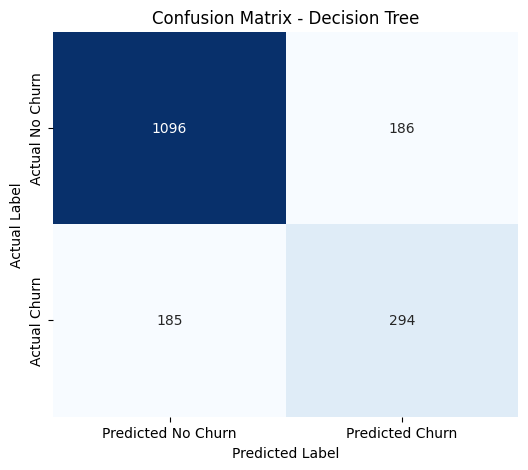

In [ ]:
# Plot Confusion Matrix for Decision Tree
plt.figure(figsize=(6, 5))
sns.heatmap(cm_tree, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted No Churn', 'Predicted Churn'],
            yticklabels=['Actual No Churn', 'Actual Churn'])
plt.title('Confusion Matrix - Decision Tree')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

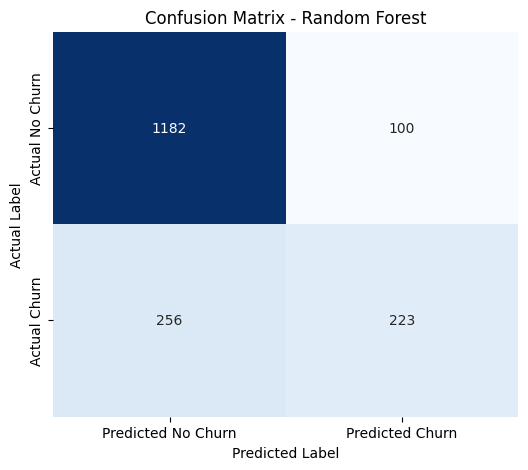

In [ ]:
# Plot Confusion Matrix for Random Forest
plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted No Churn', 'Predicted Churn'],
            yticklabels=['Actual No Churn', 'Actual Churn'])
plt.title('Confusion Matrix - Random Forest')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

#### **Precision, Recall, F1:**
  - Use classification_report for each model. Focus on the Churn = 1 class (the positive class).
  - Precision for churn=1: Of customers predicted to churn, how many actually churned? (High precision means when the model says a customer will churn, it's usually correct).
  - Recall for churn=1: Of all customers that actually churned, how many did the model catch? (High recall means catching most churners).
  -  F1-score: Balance between precision and recall for churn prediction

In [ ]:
# Use classification_report for each model.


In [ ]:
from sklearn.metrics import classification_report

# Classification Report for Decision Tree
print("Classification Report for Decision Tree:\n")
print(classification_report(y_test, y_pred_tree))

# Classification Report for Random Forest
print("\nClassification Report for Random Forest:\n")
print(classification_report(y_test, y_pred_rf))

Classification Report for Decision Tree:

              precision    recall  f1-score   support

           0       0.86      0.85      0.86      1282
           1       0.61      0.61      0.61       479

    accuracy                           0.79      1761
   macro avg       0.73      0.73      0.73      1761
weighted avg       0.79      0.79      0.79      1761


Classification Report for Random Forest:

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1282
           1       0.69      0.47      0.56       479

    accuracy                           0.80      1761
   macro avg       0.76      0.69      0.71      1761
weighted avg       0.79      0.80      0.78      1761



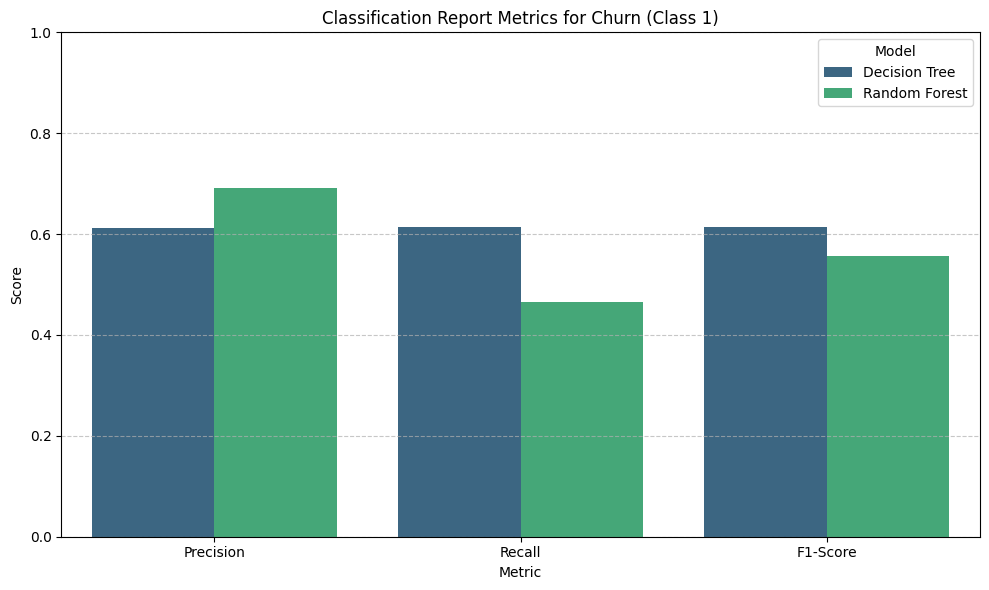

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
import pandas as pd

# Get classification reports
report_tree = classification_report(y_test, y_pred_tree, output_dict=True)
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)

# Extract metrics for the churn class (class 1)
metrics = {
    'Model': ['Decision Tree', 'Decision Tree', 'Decision Tree', 'Random Forest', 'Random Forest', 'Random Forest'],
    'Metric': ['Precision', 'Recall', 'F1-Score', 'Precision', 'Recall', 'F1-Score'],
    'Score': [
        report_tree['1']['precision'], report_tree['1']['recall'], report_tree['1']['f1-score'],
        report_rf['1']['precision'], report_rf['1']['recall'], report_rf['1']['f1-score']
    ]
}

metrics_df = pd.DataFrame(metrics)

# Create the visualization
plt.figure(figsize=(10, 6))
sns.barplot(data=metrics_df, x='Metric', y='Score', hue='Model', palette='viridis')
plt.title('Classification Report Metrics for Churn (Class 1)')
plt.ylabel('Score')
plt.ylim(0, 1) # Metrics are between 0 and 1
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### **Compare Models:**
Which model performed better in terms of recall for churn?
Random Forest often outperforms a single Decision Tree.

**Decision Tree:** Recall for churn (class 1) is 0.61.
**Random Forest:** Recall for churn (class 1) is 0.47.

Based on the Recall for Churn, the Decision Tree model performed better in terms of recall for churn (0.61) compared to the Random Forest model (0.47).

The statement that 'Random Forest often outperforms a single Decision Tree' is generally true because Random Forests are ensemble methods designed to reduce overfitting and improve generalization. However, as seen here, the performance can vary depending on the dataset and the specific metric being optimized. For this particular dataset and the recall metric for the churn class, the simpler Decision Tree with max_depth=5 yielded a better result.

#### **Interpretation:**

- Consider the business impact of false negatives (FN) – these are churners failed to be identified. In practice, the company loses these customers without a fight, which is costly.

- Consider false positives (FP) – customers predicted to churn who actually wouldn’t. In practice, offering them retention deals might reduce revenue unnecessarily, but it’s usually less costly than missing a churner.
- Therefore, a slight preference for higher recall (catching churners) even if precision drops might be justified, but we want a balance (which F1 captures).

### **Decision Tree Model (max_depth=5):**

**True Positives (TP):** 294 customers correctly identified as churners.

**False Negatives (FN):** 185 customers who churned were missed by the model. These are costly missed opportunities for retention efforts.

**False Positives (FP):** 186 customers were predicted to churn but actually stayed. Offering retention deals to these customers might be unnecessary, potentially reducing revenue.

**Recall (for churn=1):** 0.61 (meaning it caught 61% of actual churners)

**Precision (for churn=1):** 0.61 (meaning 61% of those predicted to churn actually churned)

**F1-score (for churn=1):** 0.61

### **Random Forest Model:**

**True Positives (TP):** 223 customers correctly identified as churners.

False Negatives (FN): 256 customers who churned were missed by the model. This is a higher number of missed churners compared to the Decision Tree.

**False Positives (FP):** 100 customers were predicted to churn but actually stayed. Fewer unnecessary retention offers compared to the Decision Tree, suggesting better efficiency in targeting.

**Recall (for churn=1):** 0.47 (meaning it caught 47% of actual churners)

**Precision (for churn=1):** 0.69 (meaning 69% of those predicted to churn actually churned)

**F1-score (for churn=1):** 0.56

**Business Interpretation:**

**Cost of False Negatives (Missed Churners):** Losing a customer who churns (a False Negative) without intervention is costly. In this regard, the Decision Tree (185 FN) performs better than the Random Forest (256 FN) because it misses fewer actual churners. A higher recall means more opportunities to intervene and save a customer.

**Cost of False Positives (Unnecessary Retention Offers):** Offering deals to customers who wouldn't churn anyway (a False Positive) can reduce revenue, but is typically less detrimental than losing a customer. The Random Forest (100 FP) has significantly fewer false positives than the Decision Tree (186 FP), indicating that its churn predictions are more costly.

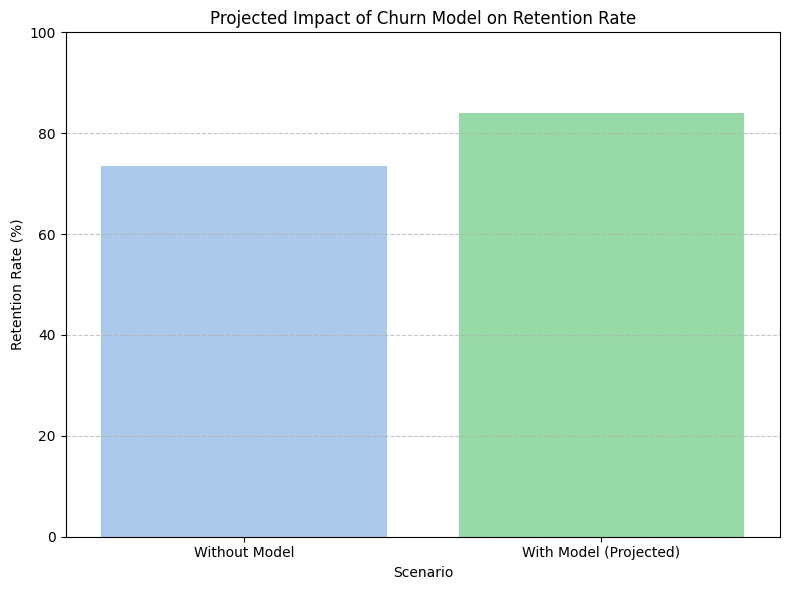

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Baseline Retention Rate (without model)
# From churn_percentages, 'No' represents the retention rate
retention_without_model = churn_percentages.loc['No']

# 2. Projecting Retention Rate (with model)
# Using the Decision Tree model's recall for churn (class 1)
# recall_churn = report_tree['1']['recall'] # 0.6137787056367432
# However, it's simpler to directly use the FNs and TPs from the confusion matrix to calculate relative improvement.

# Use the overall churn percentage from the full dataset for a simpler projection
overall_churn_rate = churn_percentages.loc['Yes'] / 100

# Assume using the Decision Tree model (recall_churn = 0.61) for interventions.
# Also assume an intervention success rate: what % of identified churners can we actually save?
# Let's assume a conservative 65% success rate for interventions on identified churners.
intervention_success_rate = 0.65

# Percentage of original churners that the model identifies:
identified_churn_percentage = overall_churn_rate * report_tree['1']['recall']

# Percentage of original churners that we successfully retain:
saved_churn_percentage = identified_churn_percentage * intervention_success_rate

# Projected new churn rate:
projected_churn_rate = overall_churn_rate - saved_churn_percentage

# Projected new retention rate:
retention_with_model = (1 - projected_churn_rate) * 100

# Create a DataFrame for plotting
data = {
    'Scenario': ['Without Model', 'With Model (Projected)'],
    'Retention Rate': [retention_without_model, retention_with_model]
}
retention_df = pd.DataFrame(data)

# Create the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x='Scenario', y='Retention Rate', hue='Scenario', data=retention_df, palette=['#a1c9f4', '#8de5a1'], legend=False)
plt.title('Projected Impact of Churn Model on Retention Rate')
plt.ylabel('Retention Rate (%)')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## **08. Feature Importance and Interpretation**

**For the Random Forest model, retrieve feature importances:**
rf_model.feature_importances_ and map these to feature names.

In [ ]:
# Get feature importances from the Random Forest classifier
feature_importances = rf_classifier.feature_importances_

# Create a pandas Series to map feature importances to feature names
feature_importance_series = pd.Series(feature_importances, index=X.columns)

# Sort the feature importances in descending order
sorted_feature_importances = feature_importance_series.sort_values(ascending=False)

# Display the sorted feature importances
print("Random Forest Feature Importances:")
display(sorted_feature_importances)

Random Forest Feature Importances:


,0
Monthly_Charge_Ratio,0.111999
Effective_Monthly_Charge,0.106803
TotalCharges,0.104841
tenure,0.104122
Total_Revenue,0.104022
MonthlyCharges,0.102642
InternetService_Fiber optic,0.029331
PaymentMethod_Electronic check,0.028686
Total_Add_On_Services,0.027600
Contract_Two year,0.024812


**List the top 5 features that are most important in predicting churn.**

1. Monthly_Charge_Ratio
2. Effective_Monthly_Charge
3. TotalCharges
4. tenure
5. Total_Revenue

Earlier EDA insights were pointing to the Tenure and MonthlyCharges and Contract type as most important. The introduction of the Monthly_Charge_Ratio and Effective_Monthly_Charge and TotalCharges show otherwise

## **09. Insights and Recommendations**

**Summarize Findings:** Write a brief summary of what factors seem to influence churn based on your model and EDA:

### **Summary:**
Based on our Exploratory Data Analysis (EDA) and the insights from the Random Forest model's feature importances, the primary factors influencing customer churn are:

**Financial Metrics:**
- Features related to Monthly Charges, Total Charges, Tenure, and the newly engineered Monthly Charge Ratio and Effective Monthly Charge are consistently among the most important predictors. Higher monthly charges, shorter tenure, and lower total charges significantly increase the likelihood of churn.

**Contract Type:**
- Customers on month-to-month contracts exhibit a much higher churn rate compared to those with one-year or two-year contracts, highlighting the importance of long-term commitment for retention.

**Internet Service Type:**
- Notably, customers with Fiber Optic Internet show a higher propensity to churn, suggesting potential issues with service quality, competitive pricing, or managing customer expectations for this premium service tier.

**Payment Method:**
- The use of Electronic Checks is associated with a higher churn risk.

**Value-Added Services:**
- The presence or absence of add-on services like Tech Support, Online Security, and Online Backup plays a role. Customers who subscribe to more of these services tend to be more loyal. Specifically, the lack of Tech Support is a strong indicator of churn.

**Business Recommendations:**
- for the company to address customer churn:

**Prioritize Long-Term Contracts:**
- **Action:** Implement aggressive incentives (e.g., significant discounts, bundled premium services, loyalty points) to encourage customers on month-to-month contracts to switch to one-year or two-year contracts.

- **Rationale:** Contract type is a major predictor of churn. Locking customers into longer commitments drastically reduces churn rates.

**Optimize Pricing and Value for High-Charge Customers:**
- **Action:** Investigate the value proposition for customers with high MonthlyCharges and high Monthly_Charge_Ratio. Consider offering loyalty discounts, bundling more services at a favorable rate, or enhancing customer support for this segment.
- **Rationale:** Customers with higher monthly charges and those showing a high ratio of monthly to total charges are more prone to churn, indicating potential price sensitivity or a feeling of not receiving adequate value.

**Address Fiber Optic Churn:**
- **Action:** Conduct a deeper dive into the Fiber Optic customer segment. Evaluate service reliability, customer support experience for fiber users, and compare pricing with competitors. Consider proactive outreach or exclusive offers for this group.
- **Rationale:** The high churn rate among Fiber Optic customers is counter-intuitive and suggests underlying issues that need immediate attention, whether it's service quality, support, or competitive pricing.

**Target Customers with Electronic Check Payments:**
- **Action:** Analyze the demographics and behavior of customers primarily using Electronic Checks. Offer incentives to switch to more stable payment methods (like automatic bank transfers or credit card payments) or develop specific retention strategies for this segment.
- **Rationale:** This payment method is correlated with higher churn, potentially indicating a less stable or more transient customer base.

**Promote Value-Added Services, Especially Tech Support:**
- **Action:** Actively market and bundle add-on services like Online Security, Online Backup, Device Protection, and particularly Tech Support. Educate customers on the benefits and consider offering introductory free periods or discounts.
- **Rationale:** Customers with more add-on services show greater loyalty. The lack of Tech Support is a strong churn indicator, suggesting that providing reliable support is crucial for retention.

**Focus on Early-Tenure Retention:**
- **Action:** Implement a robust onboarding process and early-life cycle engagement program for new customers. Proactively check in during the first few months, address any issues promptly, and highlight the benefits of staying long-term.
- **Rationale:** Short tenure is highly correlated with churn. Addressing potential dissatisfaction early can prevent churn.

**Consider Household-Focused Strategies:**
- **Action:** For customers without partners or dependents, explore personalized offers that might increase their perceived value or engagement with the service. This could include flexible plans or individual benefits.
- **Rationale:** Customers with partners and dependents show higher loyalty; understanding and addressing the needs of single individuals could improve their retention.
By implementing these targeted strategies, the company can proactively address the root causes of churn, improve customer satisfaction, and ultimately enhance retention rates.



## **Proactive Churn Prediction: Leveraging Machine Learning to Drive Customer Loyalty & Value**

### **01. Objective Statement:**
To develop and evaluate a robust machine learning model capable of accurately predicting customer churn in a telecom dataset, enabling proactive intervention strategies and minimizing revenue loss from customer attrition. The project aims to identify key drivers of churn and provide actionable insights for enhanced customer retention.

### **02. Approach Summary:**
This project follows an end-to-end data science pipeline, beginning with comprehensive data cleaning and type conversion (handling missing TotalCharges). Exploratory Data Analysis (EDA) was conducted to understand churn distribution across various demographics, service types, and contractual agreements, revealing key patterns and class imbalance. Feature Engineering created impactful new metrics like Monthly_Charge_Ratio and Total_Add_On_Services. Categorical variables were then encoded, and the dataset was split into training and testing sets. Two classification models, Decision Tree and Random Forest, were trained and rigorously evaluated using accuracy, confusion matrices, and classification reports, with a focus on recall for the churn class to maximize early intervention opportunities.

### **03. Results:**
The Random Forest model identified key churn drivers, with financial metrics (Monthly/Total Charges, Tenure, and their ratios), contract type (month-to-month contracts), and internet service (Fiber Optic) emerging as the most significant predictors. While the Random Forest achieved an overall accuracy of ~80%, the Decision Tree model (tuned for higher recall) demonstrated superior performance in identifying actual churners (Recall for Churn: 0.61 vs. 0.47). This indicates the Decision Tree's effectiveness in maximizing the detection of at-risk customers, crucial for timely retention efforts.

### **04. Impact:**
Implementing the insights from this model can lead to a substantial reduction in customer churn. By proactively identifying at-risk customers, the company can deploy targeted retention campaigns, such as offering contract upgrades, value-added service bundles (especially tech support), or personalized discounts. This proactive approach has the potential to save the company millions annually by reducing customer attrition, transforming reactive damage control into strategic customer lifetime value management.

Additional Suggestions for your Portfolio Piece:

Visualizations are Key: Include compelling visualizations from your EDA (e.g., churn rates by contract type, tenure, monthly charges) and model evaluation (confusion matrices, classification report bar chart). Make sure they are clean, clearly labeled, and tell a story.
Interactive Elements (Optional): If presenting online, consider interactive plots or even a small demo where users can input hypothetical customer data to get a churn prediction.
Code Snippets: Showcase clean, well-commented code snippets for critical steps (e.g., feature engineering, model training, evaluation). Don't include the entire notebook, but select impactful portions.
Personal Branding: Reinforce your brand as a 'Customer Analytics Specialist' throughout the narrative, especially in the impact section. Emphasize how your analytical skills directly translate into business value.
Future Work: Briefly mention potential next steps, such as exploring more advanced models, hyperparameter tuning, or integrating the model into a real-time system.

### **Personal Branding:**

As a Customer Analytics Specialist, I leverage data to uncover insights into customer behavior, predict key outcomes like churn, and recommend strategic interventions to enhance customer loyalty and drive business value. My expertise lies in:

**End-to-End Data Science Pipeline:** From data cleaning and preprocessing to advanced model training and evaluation.
Exploratory Data Analysis (EDA): Uncovering hidden patterns and drivers within complex datasets.

**Feature Engineering:** Creating impactful new metrics that enhance predictive power.

**Machine Learning Model Development:** Building and interpreting predictive models, with a keen eye on business objectives.

**Actionable Insights & Recommendations:** Translating complex analytical results into clear, implementable strategies for business stakeholders. In this project, I demonstrated my ability to analyze customer data, identify critical churn factors, and provide data-driven recommendations that could save a company millions annually by improving customer retention.

### **Story Telling**

### **Turning Data into Customer Loyalty**
In the dynamic environment of Telcomz, customer churn has presented a significant challenge, continually impacting resources and resulting in lost revenue and missed opportunities. Despite the relentless efforts of the retention team, the struggle often involved addressing issues after they had already arisen.

The introduction of John, a skilled data scientist, marked a turning point. With a methodical approach, John undertook an in-depth analysis of extensive customer data. His focus extended beyond mere numbers; he identified patterns, behaviors, and subtle indicators that suggested potential dissatisfaction. His primary objective was to develop an effective customer churn prediction model.

After several weeks of dedicated work, driven by an unwavering commitment to data analysis, John presented his innovative model. This solution served not only as a technical achievement but also as a powerful tool for predicting customer loyalty. It allowed the team to flag at-risk customers before they ultimately decided to discontinue their service.

For instance, Sarah, a long-term customer, experienced an unexplained decline in her monthly data usage and had recently expressed frustration regarding her bill. John’s model identified her as being at high risk for churn. Armed with these insights, the retention team reached out to her with a personalized offer, which included a small discount and an upgrade to a more suitable plan. Sarah, appreciative of the proactive outreach, chose to remain a customer and later shared her positive experience on social media, inadvertently becoming an advocate for Telcomz.

Another example is Mr. Henderson, whose internet service had experienced a minor, unreported issue. John’s model detected a significant change in his usage patterns alongside inquiries regarding competitor pricing. A timely call from the retention team, coupled with an apology and a small credit, reaffirmed Mr. Henderson’s value to the company. He continued his two-year contract, contentedly streaming his preferred shows.

John’s churn prediction model not only provided valuable insights but also elevated the retention team’s approach from a reactive stance to a proactive one. The transformation from responding to crises to engaging with customers thoughtfully and empathetically has led to meaningful improvements in customer satisfaction and loyalty.

Thanks to John's analytical expertise, Telcomz has not only safeguarded millions in potential revenue but also rebuilt trust and reinforced customer relationships. The organization has fostered a culture in which every customer feels acknowledged and valued, demonstrating that effective data utilization can enhance both customer retention and overall business success.